<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥Masked Language Model - BERT🔥</div>
</div>

![](https://www.microsoft.com/en-us/research/uploads/prod/2020/12/MpNet-Figure-1.jpg)

Training a Masked Language Model (MLM) from scratch involves several steps, including data collection, preprocessing, model architecture selection, training, and evaluation. Here's a detailed guide:

### Step 1: Data Collection
1. **Define Corpus**: Determine the type of text data you want to train the MLM on. This could be general text from websites, books, or specific domain-related text.
2. **Collect Data**: Gather a large corpus of text data relevant to your task. You can use web scraping tools, APIs, or existing datasets.

### Step 2: Preprocessing
1. **Text Cleaning**:
   - Remove HTML tags, special characters, and non-text elements.
   - Normalize text (lowercasing, removing extra spaces).
2. **Tokenization**:
   - Split text into individual words or subwords (tokenization). You can use libraries like SpaCy, NLTK, or tokenizers from Hugging Face.
3. **Vocabulary Building**:
   - Build a vocabulary from the tokenized text. This vocabulary will map tokens to unique IDs.

### Step 3: Model Architecture
1. **Select Architecture**: Decide on the architecture for your MLM. Popular choices include Transformer-based architectures like BERT, GPT, or RoBERTa.
2. **Customize Architecture**: Design the architecture according to your specific requirements, considering factors like model size, number of layers, and attention mechanisms.

### Step 4: Training
1. **Initialize Model Parameters**: Initialize the model parameters randomly or with a predefined strategy.
2. **Define Training Objective**:
   - Masked Language Modeling: Randomly mask tokens in the input and train the model to predict them.
   - Next Sentence Prediction (optional): If your data includes sentence pairs, you can also train the model for predicting whether the second sentence follows the first.
3. **Training Procedure**:
   - Feed input sequences into the model.
   - Compute the loss between the predicted tokens and the actual masked tokens.
   - Use backpropagation to update the model parameters.
   - Repeat this process for multiple epochs until convergence.
4. **Hyperparameter Tuning**:
   - Experiment with learning rate, batch size, optimizer choice (e.g., Adam), dropout rates, etc.
   - Monitor training metrics like loss and validation performance.

### Step 5: Evaluation
1. **Intrinsic Evaluation**:
   - Assess the model's performance on tasks like masked token prediction accuracy.
2. **Extrinsic Evaluation**:
   - Evaluate the model's performance on downstream tasks relevant to your application, such as text classification, named entity recognition, or question answering.
3. **Fine-Tuning** (Optional):
   - Fine-tune the trained MLM on specific downstream tasks to further improve performance.

### Step 6: Deployment
1. **Model Deployment**:
   - Integrate the trained model into your application or deploy it as a service.
   - Ensure scalability, performance, and reliability in the deployment environment.

### Additional Considerations
- **Hardware Resources**: Ensure access to sufficient computational resources (GPUs or TPUs) for training large models.
- **Data Augmentation**: Explore techniques like data augmentation to increase the diversity of your training data.
- **Regularization**: Apply regularization techniques (e.g., dropout) to prevent overfitting during training.

By following these steps, you can train a Masked Language Model from scratch tailored to your specific domain or task.

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔗Related Works🔗</div>
</div>

* GitHub =>
[GitHub](https://github.com/Nishant2018)
<br><br>
* Text Generation Using GPT-2 =>
[Text Generation](https://www.kaggle.com/code/endofnight17j03/textgeneration-transformers-gpt-2)
<br><br>
* Text Mask Generation BERT Model =>
[Text Mask Generation](https://www.kaggle.com/code/endofnight17j03/text-mask-generation-googlebert-llm)
<br><br>
* Sentiment Analysis =>
[Text Mask Generation](https://www.kaggle.com/code/endofnight17j03/imdb-movies-nlp-sentiment-analysis)

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📚Importing Libraries📚</div>
</div>

<div style="text-align:center">
    <img src="https://static.vecteezy.com/system/resources/thumbnails/013/083/739/small_2x/stick-man-with-book-shelves-in-library-education-and-learning-concept-3d-illustration-or-3d-rendering-png.png
" alt="Image">
</div>

In [1]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.0 MB/s eta 0:00:00


In [2]:
!pip install tqdm rich

In [3]:
from textblob import Word
import nltk
import re
import random
import string
import time
import torch
from tqdm.notebook import tqdm
from rich.console import Console
from rich.progress import track
import contractions
nltk.data.path.append("/kaggle/working/")
nltk.download('wordnet')
import numpy as np 
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from transformers import BertTokenizer, BertForMaskedLM
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
stop_words = set(stopwords.words('english'))
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/kaggle/input/bert-model-trained/BERT_model.pth
/kaggle/input/tokenized-data/tokenized_data.pkl
/kaggle/input/blog-authorship-corpus/blogtext.csv
/kaggle/input/wekipedia-articles/promotional.csv
/kaggle/input/wekipedia-articles/good.csv


<div class="text_cell_render border-box-sizing rendered_html">
<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Libraries:</b> Successfully import the recquired library
</div>
</div>

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📂Reading The File📂</div>
</div>

<div style="text-align:center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Reading-297450.png/1280px-Reading-297450.png
" alt="Image">
</div>

In [4]:
file_paths = [
    #'/kaggle/input/blog-authorship-corpus/blogtext.csv',
    '/kaggle/input/wekipedia-articles/good.csv',
    #'/kaggle/input/wekipedia-articles/promotional.csv'
]
text_column = 'text'

In [5]:
Data_1 = pd.read_csv('/kaggle/input/blog-authorship-corpus/blogtext.csv') 
Data_2 = pd.read_csv('/kaggle/input/wekipedia-articles/good.csv') 
Data_3 = pd.read_csv('/kaggle/input/wekipedia-articles/promotional.csv') 

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📜Sample Of Dataset📜</div>
</div>

In [6]:
Data_1.sample(5)

,id,gender,age,topic,sign,date,text
645644,1675646,male,25,indUnk,Leo,"17,July,2003",Is it wrong to enjoy a movie that i...
153537,834914,male,24,indUnk,Aries,"01,July,2004",I know what yout thinking.. ...
568986,1650898,male,38,Communications-Media,Leo,"07,October,2003","GEORGE DUBYA: PRESIDENT, POET, PROPHET..."
337570,2229187,female,26,indUnk,Pisces,"25,July,2004",That's what Mike calls it. We spe...
275527,2125697,female,25,Marketing,Libra,"03,May,2004",TEA SWAP A spot of tea ...


In [7]:
Data_1.shape

(681284, 7)

In [8]:
Data_2.sample(5)

,text,url
27333,"Thanjavur, formerly Tanjore, is a city in the ...",https://en.wikipedia.org/wiki/Thanjavur
4556,The 107th Boat Race took place on 1 April 1961...,https://en.wikipedia.org/wiki/The%20Boat%20Rac...
30110,"Yuffie Kisaragi , Yufi Kisaragi is a video gam...",https://en.wikipedia.org/wiki/Yuffie%20Kisaragi
7826,The Decay of Fiction is a 2002 American 35mm p...,https://en.wikipedia.org/wiki/The%20Decay%20of...
23704,"William Montagu, alias de Montacute, 1st Earl ...",https://en.wikipedia.org/wiki/William%20Montag...


In [9]:
Data_2.shape

(30279, 2)

In [10]:
Data_3.sample(3)

,text,advert,coi,fanpov,pr,resume,url
15938,The Dr. Kiran C. Patel Center for Global Solut...,1,0,0,0,0,https://en.wikipedia.org/wiki/Dr.%20Kiran%20C....
6278,"Enel X North America, formerly EnerNOC, is an ...",1,0,0,1,0,https://en.wikipedia.org/wiki/Enel%20X
14147,The Music Technology Group MTG is a research g...,1,0,0,0,0,https://en.wikipedia.org/wiki/Music%20Technolo...


In [11]:
Data_3.shape

(23837, 7)

In [12]:
Data_1.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [13]:
Data_2.columns

Index(['text', 'url'], dtype='object')

In [14]:
Data_3.columns

Index(['text', 'advert', 'coi', 'fanpov', 'pr', 'resume', 'url'], dtype='object')

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🥨Conversion Of Dataset🥨</div>
</div>

In [15]:
def collect_data(file_paths, text_column):
    all_data = []
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        data = df[text_column].tolist()
        all_data.extend(data)
    return all_data


data = collect_data(file_paths, text_column)

In [16]:
sample_size = 1
for i, text in enumerate(data[:sample_size]):
    print(f"Sample {i+1}: {text}\n")

Sample 1: Nycticebus linglom is a fossil strepsirrhine primate from the Miocene of Thailand. Known only from a single tooth, an upper third molar, it is thought to be related to the living slow lorises genus Nycticebus , but the material is not sufficient to assign the species to Nycticebus with certainty, and the species name therefore uses open nomenclature. With a width of 1.82 mm, this tooth is very small for a primate. It is triangular in shape, supported by a single root, and shows three main cusps, in addition to various crests. The absence of a fourth cusp, the hypocone, distinguishes it from various other prosimian primates. Nycticebus linglom was described in 1997 by French paleontologists Pierre Mein and Leonard Ginsburg in a report on the fossil mammals of Li Mae Long, a Miocene site in Thailand. The animal is known from a single tooth, and on the basis of comparisons with other prosimian primates Mein and Ginsburg concluded that it is most closely related to the living slo

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🛠Preprocessing🛠</div>
</div>

<div style="text-align:center">
    <img src="https://media.licdn.com/dms/image/C4D12AQHsdEIHnH7KNQ/article-cover_image-shrink_600_2000/0/1566722923152?e=2147483647&v=beta&t=YsmFCdp6hlGK7-8KYTadb6LXwKrnhBrmLlRt-RNfjIg
" alt="Image">
</div>

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
    1. LowerCasing
  </div>
</div>


In [17]:
def lower_text(text):
    text = text.lower()
    return text

data = [lower_text(text) for text in data]

In [18]:
sample_size = 1
for i, text in enumerate(data[:sample_size]):
    print(f"Sample {i+1}: {text}\n")

Sample 1: nycticebus linglom is a fossil strepsirrhine primate from the miocene of thailand. known only from a single tooth, an upper third molar, it is thought to be related to the living slow lorises genus nycticebus , but the material is not sufficient to assign the species to nycticebus with certainty, and the species name therefore uses open nomenclature. with a width of 1.82 mm, this tooth is very small for a primate. it is triangular in shape, supported by a single root, and shows three main cusps, in addition to various crests. the absence of a fourth cusp, the hypocone, distinguishes it from various other prosimian primates. nycticebus linglom was described in 1997 by french paleontologists pierre mein and leonard ginsburg in a report on the fossil mammals of li mae long, a miocene site in thailand. the animal is known from a single tooth, and on the basis of comparisons with other prosimian primates mein and ginsburg concluded that it is most closely related to the living slo

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
    2. Removing HTML
  </div>
</div>


In [19]:
def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

data = [remove_html(text) for text in data]

In [20]:
sample_size = 1
for i, text in enumerate(data[:sample_size]):
    print(f"Sample {i+1}: {text}\n")

Sample 1: nycticebus linglom is a fossil strepsirrhine primate from the miocene of thailand. known only from a single tooth, an upper third molar, it is thought to be related to the living slow lorises genus nycticebus , but the material is not sufficient to assign the species to nycticebus with certainty, and the species name therefore uses open nomenclature. with a width of 1.82 mm, this tooth is very small for a primate. it is triangular in shape, supported by a single root, and shows three main cusps, in addition to various crests. the absence of a fourth cusp, the hypocone, distinguishes it from various other prosimian primates. nycticebus linglom was described in 1997 by french paleontologists pierre mein and leonard ginsburg in a report on the fossil mammals of li mae long, a miocene site in thailand. the animal is known from a single tooth, and on the basis of comparisons with other prosimian primates mein and ginsburg concluded that it is most closely related to the living slo

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
    3. Removing URL's
  </div>
</div>


In [21]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

data = [remove_url(text) for text in data]

In [22]:
sample_size = 1
for i, text in enumerate(data[:sample_size]):
    print(f"Sample {i+1}: {text}\n")

Sample 1: nycticebus linglom is a fossil strepsirrhine primate from the miocene of thailand. known only from a single tooth, an upper third molar, it is thought to be related to the living slow lorises genus nycticebus , but the material is not sufficient to assign the species to nycticebus with certainty, and the species name therefore uses open nomenclature. with a width of 1.82 mm, this tooth is very small for a primate. it is triangular in shape, supported by a single root, and shows three main cusps, in addition to various crests. the absence of a fourth cusp, the hypocone, distinguishes it from various other prosimian primates. nycticebus linglom was described in 1997 by french paleontologists pierre mein and leonard ginsburg in a report on the fossil mammals of li mae long, a miocene site in thailand. the animal is known from a single tooth, and on the basis of comparisons with other prosimian primates mein and ginsburg concluded that it is most closely related to the living slo

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
    4. Removing Alphanumeric
  </div>
</div>


In [23]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    return text

data = [preprocess_text(text) for text in data]

In [24]:
sample_size = 1
for i, text in enumerate(data[:sample_size]):
    print(f"Sample {i+1}: {text}\n")

Sample 1: nycticebus linglom is a fossil strepsirrhine primate from the miocene of thailand known only from a single tooth an upper third molar it is thought to be related to the living slow lorises genus nycticebus  but the material is not sufficient to assign the species to nycticebus with certainty and the species name therefore uses open nomenclature with a width of 182 mm this tooth is very small for a primate it is triangular in shape supported by a single root and shows three main cusps in addition to various crests the absence of a fourth cusp the hypocone distinguishes it from various other prosimian primates nycticebus linglom was described in 1997 by french paleontologists pierre mein and leonard ginsburg in a report on the fossil mammals of li mae long a miocene site in thailand the animal is known from a single tooth and on the basis of comparisons with other prosimian primates mein and ginsburg concluded that it is most closely related to the living slow lorises genus nyc

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
    5. Removing Punctuation
  </div>
</div>


In [25]:
#Punctuations in english............
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def remove_punctuation(text):
    exclude = set(string.punctuation)
    return ''.join(char for char in text if char not in exclude)

data = [remove_punctuation(text) for text in data]

In [27]:
sample_size = 1
for i, text in enumerate(data[:sample_size]):
    print(f"Sample {i+1}: {text}\n")

Sample 1: nycticebus linglom is a fossil strepsirrhine primate from the miocene of thailand known only from a single tooth an upper third molar it is thought to be related to the living slow lorises genus nycticebus  but the material is not sufficient to assign the species to nycticebus with certainty and the species name therefore uses open nomenclature with a width of 182 mm this tooth is very small for a primate it is triangular in shape supported by a single root and shows three main cusps in addition to various crests the absence of a fourth cusp the hypocone distinguishes it from various other prosimian primates nycticebus linglom was described in 1997 by french paleontologists pierre mein and leonard ginsburg in a report on the fossil mammals of li mae long a miocene site in thailand the animal is known from a single tooth and on the basis of comparisons with other prosimian primates mein and ginsburg concluded that it is most closely related to the living slow lorises genus nyc

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
    5. Removing Contractions
  </div>
</div>


In [28]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

data = [expand_contractions(text) for text in data]

In [29]:
sample_size = 1
for i, text in enumerate(data[:sample_size]):
    print(f"Sample {i+1}: {text}\n")

Sample 1: nycticebus linglom is a fossil strepsirrhine primate from the miocene of thailand known only from a single tooth an upper third molar it is thought to be related to the living slow lorises genus nycticebus  but the material is not sufficient to assign the species to nycticebus with certainty and the species name therefore uses open nomenclature with a width of 182 mm this tooth is very small for a primate it is triangular in shape supported by a single root and shows three main cusps in addition to various crests the absence of a fourth cusp the hypocone distinguishes it from various other prosimian primates nycticebus linglom was described in 1997 by french paleontologists pierre mein and leonard ginsburg in a report on the fossil mammals of li mae long a miocene site in thailand the animal is known from a single tooth and on the basis of comparisons with other prosimian primates mein and ginsburg concluded that it is most closely related to the living slow lorises genus nyc

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
    6. Removing Extra Spaces
  </div>
</div>


In [30]:
def removing_extra_space(text):
    text = re.sub(r'\s+', ' ', text).strip()  
    return text

data = [removing_extra_space(text) for text in data]

In [31]:
sample_size = 1
for i, text in enumerate(data[:sample_size]):
    print(f"Sample {i+1}: {text}\n")

Sample 1: nycticebus linglom is a fossil strepsirrhine primate from the miocene of thailand known only from a single tooth an upper third molar it is thought to be related to the living slow lorises genus nycticebus but the material is not sufficient to assign the species to nycticebus with certainty and the species name therefore uses open nomenclature with a width of 182 mm this tooth is very small for a primate it is triangular in shape supported by a single root and shows three main cusps in addition to various crests the absence of a fourth cusp the hypocone distinguishes it from various other prosimian primates nycticebus linglom was described in 1997 by french paleontologists pierre mein and leonard ginsburg in a report on the fossil mammals of li mae long a miocene site in thailand the animal is known from a single tooth and on the basis of comparisons with other prosimian primates mein and ginsburg concluded that it is most closely related to the living slow lorises genus nyct

In [32]:
data_temp = data

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
    7. Remove Stopwords
  </div>
</div>


In [33]:
#stop_words = set(stopwords.words('english'))

In [34]:
#def remove_stopwords(text, stop_words):
#    words = text.split()  # Tokenize the text into words
#    filtered_words = [word for word in words if word.lower() not in stop_words]
#    return ' '.join(filtered_words)

# Assuming you have defined or imported the list of stopwords
#stop_words = set(stopwords.words('english'))

#data_temp = [remove_stopwords(text, stop_words) for text in data_temp]

In [35]:
#sample_size = 2
#for i, text in enumerate(data_temp[:sample_size]):
#    print(f"Sample {i+1}: {text}\n")

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
    8. Tokenization
  </div>
</div>


In [36]:
# Tokenization
data_temp = [word_tokenize(text) for text in data_temp]

In [37]:
sample_size = 2
for i, text in enumerate(data_temp[:sample_size]):
    print(f"Sample {i+1}: {text}\n")

Sample 1: ['nycticebus', 'linglom', 'is', 'a', 'fossil', 'strepsirrhine', 'primate', 'from', 'the', 'miocene', 'of', 'thailand', 'known', 'only', 'from', 'a', 'single', 'tooth', 'an', 'upper', 'third', 'molar', 'it', 'is', 'thought', 'to', 'be', 'related', 'to', 'the', 'living', 'slow', 'lorises', 'genus', 'nycticebus', 'but', 'the', 'material', 'is', 'not', 'sufficient', 'to', 'assign', 'the', 'species', 'to', 'nycticebus', 'with', 'certainty', 'and', 'the', 'species', 'name', 'therefore', 'uses', 'open', 'nomenclature', 'with', 'a', 'width', 'of', '182', 'mm', 'this', 'tooth', 'is', 'very', 'small', 'for', 'a', 'primate', 'it', 'is', 'triangular', 'in', 'shape', 'supported', 'by', 'a', 'single', 'root', 'and', 'shows', 'three', 'main', 'cusps', 'in', 'addition', 'to', 'various', 'crests', 'the', 'absence', 'of', 'a', 'fourth', 'cusp', 'the', 'hypocone', 'distinguishes', 'it', 'from', 'various', 'other', 'prosimian', 'primates', 'nycticebus', 'linglom', 'was', 'described', 'in', '1997

In [38]:
# Define the file path to save the tokenized data
tokenized_data_path = "tokenized_data.pkl"

# Save the tokenized data to a file
with open(tokenized_data_path, "wb") as f:
    pickle.dump(data_temp, f)

print("Tokenized data saved successfully.")

Tokenized data saved successfully.


In [39]:
tokenized_data_path = "/kaggle/input/tokenized-data/tokenized_data.pkl"

#Load the tokenized data from the file
with open(tokenized_data_path, "rb") as f:
    data_temp = pickle.load(f)

In [40]:
from joblib import dump, load

# Define the file path to save the tokenized data
tokenized_data_path = "tokenized_data.joblib"

# Save the tokenized data to a file
dump(data_temp, tokenized_data_path)

print("Tokenized data saved successfully.")

# Load the tokenized data from the file
loaded_data_temp = load(tokenized_data_path)

Tokenized data saved successfully.


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📜Vocabulary Building📜</div>
</div>


<div style="text-align:center">
    <img src="https://png.pngtree.com/template/20191014/ourmid/pngtree-real-estate-logo-design-template-building-logo-image_317801.jpg
" alt="Image">
</div>

In [41]:
vocab = set()
for tokens in data_temp:
    vocab.update(tokens)

word2id = {word: i for i, word in enumerate(vocab)}
id2word = {i: word for word, i in word2id.items()}

<div class="text_cell_render border-box-sizing rendered_html">
    <div style="color:black; border: 2px solid #6f31c1; background-color:#ffffff; padding: 20px; border-radius: 15px; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:left; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
        <h2>Vocabulary Generation Explanation</h2>
        <p>The provided code snippet generates a vocabulary from a collection of tokenized data and creates mappings between words and their corresponding IDs.</p>
        <ul>
            <li><b>Step 1: Vocabulary Initialization</b>
                <ul>
                    <li>A set named `vocab` is initialized to store unique tokens from the tokenized data.</li>
                </ul>
            </li>
            <li><b>Step 2: Populate Vocabulary</b>
                <ul>
                    <li>Iterates through each list of tokens in `data_temp`.</li>
                    <li>Updates the `vocab` set with unique tokens from each list.</li>
                </ul>
            </li>
            <li><b>Step 3: Word-to-ID Mapping</b>
                <ul>
                    <li>Creates a dictionary named `word2id` to map each word in the vocabulary to a unique integer ID.</li>
                    <li>Uses list comprehension to iterate over the `vocab` set and enumerate its elements, assigning an incremental integer index to each word.</li>
                </ul>
            </li>
            <li><b>Step 4: ID-to-Word Mapping</b>
                <ul>
                    <li>Creates a dictionary named `id2word` to map integer IDs back to their corresponding words in the vocabulary.</li>
                    <li>Uses dictionary comprehension to reverse the key-value pairs of the `word2id` dictionary.</li>
                </ul>
            </li>
        </ul>
    </div>
</div>


In [42]:
vocab_size = len(vocab)

In [43]:
print("Lenth of Vocabulary is: ",len(vocab))

Lenth of Vocabulary is:  623208


In [44]:
sample_size = 1
for i, text in enumerate(data_temp[:sample_size]):
    print(f"Sample {i+1}: {text}\n")

Sample 1: ['nycticebus', 'linglom', 'is', 'a', 'fossil', 'strepsirrhine', 'primate', 'from', 'the', 'miocene', 'of', 'thailand', 'known', 'only', 'from', 'a', 'single', 'tooth', 'an', 'upper', 'third', 'molar', 'it', 'is', 'thought', 'to', 'be', 'related', 'to', 'the', 'living', 'slow', 'lorises', 'genus', 'nycticebus', 'but', 'the', 'material', 'is', 'not', 'sufficient', 'to', 'assign', 'the', 'species', 'to', 'nycticebus', 'with', 'certainty', 'and', 'the', 'species', 'name', 'therefore', 'uses', 'open', 'nomenclature', 'with', 'a', 'width', 'of', '182', 'mm', 'this', 'tooth', 'is', 'very', 'small', 'for', 'a', 'primate', 'it', 'is', 'triangular', 'in', 'shape', 'supported', 'by', 'a', 'single', 'root', 'and', 'shows', 'three', 'main', 'cusps', 'in', 'addition', 'to', 'various', 'crests', 'the', 'absence', 'of', 'a', 'fourth', 'cusp', 'the', 'hypocone', 'distinguishes', 'it', 'from', 'various', 'other', 'prosimian', 'primates', 'nycticebus', 'linglom', 'was', 'described', 'in', '1997


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥Pre-Trained BERT - Model Architecture🔥</div>
</div>

![](https://production-media.paperswithcode.com/methods/new_BERT_Overall.jpg)

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
    Masking (15%) Data & Tokenization
  </div>
</div>


In [45]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [46]:
def mask_tokens(tokenized_data, tokenizer):
    mask_token_id = tokenizer.mask_token_id
    for tokens in tokenized_data:
        for i, token in enumerate(tokens):
            if random.random() < 0.15:  # Mask 15% of the tokens
                tokens[i] = mask_token_id
    return tokenized_data

<div class="text_cell_render border-box-sizing rendered_html">
    <div style="color:black; border: 2px solid #6f31c1; background-color:#ffffff; padding: 20px; border-radius: 15px; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:left; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
        <h2>Mask Tokens Function Explanation</h2>
        <p>The provided function `mask_tokens` masks a percentage of tokens in tokenized data according to a specified probability. This function is typically used in masked language model (MLM) training, where a certain percentage of tokens are randomly replaced with a special mask token for the model to predict.</p>
        <ul>
            <li><b>Input Parameters:</b>
                <ul>
                    <li><b>`tokenized_data`:</b> A list of tokenized sentences or text data, where each element is a list of tokens.</li>
                    <li><b>`tokenizer`:</b> The tokenizer object used to tokenize the data.</li>
                </ul>
            </li>
            <li><b>Masking Tokens:</b>
                <ul>
                    <li>Iterates through each list of tokens in the `tokenized_data`.</li>
                    <li>For each tokenized sentence, iterates through its tokens.</li>
                    <li>If a randomly generated value is less than 0.15 (indicating a 15% probability), the token at the current index is replaced with the mask token ID obtained from the tokenizer.</li>
                </ul>
            </li>
            <li><b>Output:</b>
                <ul>
                    <li>Returns the modified `tokenized_data` with a percentage of tokens masked.</li>
                </ul>
            </li>
        </ul>
    </div>
</div>


In [47]:
## Assuming `tokenized_data` is a list of lists of token IDs
tokenized_data = mask_tokens(data_temp, tokenizer)

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
    Custom Dataset
  </div>
</div>


In [48]:
class CustomDataset(Dataset):
    def __init__(self, tokenized_data, tokenizer):
        """
        Initialization of the custom dataset class.
        
        Parameters:
        - tokenized_data: List of tokenized text data, where each sample is a list of tokens (strings).
        - tokenizer: Tokenizer instance used to convert the tokens into input IDs and attention masks.
        """
        self.tokenized_data = tokenized_data
        self.tokenizer = tokenizer

    def __len__(self):
        """
        Returns the length of the dataset, which is the total number of tokenized samples.
        """
        return len(self.tokenized_data)

    def __getitem__(self, idx):
        """
        Fetches a specific sample from the dataset by index.
        
        Parameters:
        - idx: Index to fetch the specific sample.
        
        Returns:
        - Dictionary containing input_ids, attention_mask, and labels, with the first dimension squeezed.
        """
        tokens = self.tokenized_data[idx]
        # Ensure tokens are strings for join operation
        tokens = [str(token) for token in tokens]
        inputs = self.tokenizer.encode_plus(
            ' '.join(tokens),
            add_special_tokens=True,
            padding='max_length',
            truncation=True,
            max_length=128,
            return_tensors='pt'
        )
        labels = inputs['input_ids'].clone()
        labels[inputs['attention_mask'] == 0] = -100  # Masking out tokens we don't want to predict
        return {
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0),
            'labels': labels.squeeze(0)
        }


<div class="text_cell_render border-box-sizing rendered_html">
    <div style="color:black; border: 2px solid #6f31c1; background-color:#ffffff; padding: 20px; border-radius: 15px; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:left; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
        <h2>Custom Dataset Class for BERT Explanation</h2>
        <ul>
            <li><b>Initialization (`__init__` method):</b>
                <ul>
                    <li><b>`tokenized_data`:</b> List of tokenized text data, where each sample is a list of tokens.</li>
                    <li><b>`tokenizer`:</b> Tokenizer instance used to convert the tokens into input IDs and attention masks.</li>
                </ul>
            </li>
            <li><b>Length Method (`__len__`):</b>
                <ul>
                    <li>Returns the length of the dataset, which is the total number of tokenized samples.</li>
                </ul>
            </li>
            <li><b>Get Item Method (`__getitem__`):</b>
                <ul>
                    <li><b>`idx`:</b> Index to fetch a specific sample from the dataset.</li>
                    <li><b>Token Joining:</b> Joins the tokens using spaces to form a single string.</li>
                    <li><b>Encoding:</b>
                        <ul>
                            <li><b>`encode_plus`:</b> Encodes the joined string into input IDs and attention masks, with the following options:
                                <ul>
                                    <li><b>`add_special_tokens`:</b> Adds special tokens like `[CLS]` and `[SEP]` to the input sequence.</li>
                                    <li><b>`padding='max_length'`:</b> Pads the input sequence to the maximum length specified.</li>
                                    <li><b>`truncation=True`:</b> Truncates the input sequence if it exceeds the maximum length.</li>
                                    <li><b>`max_length=128`:</b> Sets the maximum length for padding and truncation.</li>
                                    <li><b>`return_tensors='pt'`:</b> Returns the encoded input as PyTorch tensors.</li>
                                </ul>
                            </li>
                        </ul>
                    </li>
                    <li><b>Labels:</b>
                        <ul>
                            <li><b>Clone `input_ids`:</b> Creates a copy of the input IDs to be used as labels.</li>
                            <li><b>Masking:</b> Sets the labels to `-100` for tokens where the attention mask is `0`, ensuring these positions are ignored during loss computation.</li>
                        </ul>
                    </li>
                    <li><b>Return Dictionary:</b>
                        <ul>
                            <li>Returns a dictionary containing `input_ids`, `attention_mask`, and `labels`, each with the first dimension squeezed to match the required shape for the model.</li>
                        </ul>
                    </li>
                </ul>
            </li>
        </ul>
    </div>
</div>


In [49]:
# Initialize tokenizer and model
model = BertForMaskedLM.from_pretrained('bert-base-uncased')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [50]:
# Custom dataset and dataloader
dataset = CustomDataset(tokenized_data, tokenizer)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
    Model Training
  </div>
</div>


In [51]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [52]:
# Initialize rich console for styled output
console = Console()

# Move model to the GPU if available
model.to(device)

# Define optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# Training loop
model.train()
for epoch in range(2):  # 3 is the number of epochs
    total_loss = 0
    
    # Styled header for the epoch
    console.rule(f"[bold blue]Epoch {epoch + 1}[/bold blue]")
    
    for batch_idx, batch in enumerate(dataloader, start=1):
        # Move batch to GPU
        batch = {k: v.to(device) for k, v in batch.items()}
        
        optimizer.zero_grad()
        inputs = {
            'input_ids': batch['input_ids'],
            'attention_mask': batch['attention_mask'],
            'labels': batch['labels']
        }
        outputs = model(**inputs)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        
        # Print progress
        avg_loss = total_loss / batch_idx
        console.print(f"Batch {batch_idx}/{len(dataloader)} - Loss: [bold]{avg_loss:.4f}[/bold]", end="\r")
    
    avg_loss = total_loss / len(dataloader)
    console.log(f"\n[bold green]Epoch {epoch + 1} completed[/bold green]: Average Loss = {avg_loss:.4f}")
    
    # Display progress bar
    for _ in range(100):
        time.sleep(0.1)  # Simulate processing time

    console.rule("[bold yellow]End of Epoch[/bold yellow]")

console.log("[bold cyan]Training Complete[/bold cyan]")

───────────────────────────────────────────────────── Epoch 1 ─────────────────────────────────────────────────────

Batch 1/947 - Loss: 0.5740

Batch 2/947 - Loss: 0.4305

Batch 3/947 - Loss: 0.3613

Batch 4/947 - Loss: 0.3150

Batch 5/947 - Loss: 0.2814

Batch 6/947 - Loss: 0.2546

Batch 7/947 - Loss: 0.2314

Batch 8/947 - Loss: 0.2106

Batch 9/947 - Loss: 0.1924

Batch 10/947 - Loss: 0.1755

Batch 11/947 - Loss: 0.1612

Batch 12/947 - Loss: 0.1486

Batch 13/947 - Loss: 0.1382

Batch 14/947 - Loss: 0.1290

Batch 15/947 - Loss: 0.1208

Batch 16/947 - Loss: 0.1138

Batch 17/947 - Loss: 0.1074

Batch 18/947 - Loss: 0.1017

Batch 19/947 - Loss: 0.0967

Batch 20/947 - Loss: 0.0921

Batch 21/947 - Loss: 0.0879

Batch 22/947 - Loss: 0.0841

Batch 23/947 - Loss: 0.0806

Batch 24/947 - Loss: 0.0774

Batch 25/947 - Loss: 0.0744

Batch 26/947 - Loss: 0.0716

Batch 27/947 - Loss: 0.0691

Batch 28/947 - Loss: 0.0667

Batch 29/947 - Loss: 0.0645

Batch 30/947 - Loss: 0.0624

Batch 31/947 - Loss: 0.0605

Batch 32/947 - Loss: 0.0587

Batch 33/947 - Loss: 0.0569

Batch 34/947 - Loss: 0.0553

Batch 35/947 - Loss: 0.0539

Batch 36/947 - Loss: 0.0524

Batch 37/947 - Loss: 0.0510

Batch 38/947 - Loss: 0.0498

Batch 39/947 - Loss: 0.0485

Batch 40/947 - Loss: 0.0474

Batch 41/947 - Loss: 0.0463

Batch 42/947 - Loss: 0.0452

Batch 43/947 - Loss: 0.0442

Batch 44/947 - Loss: 0.0432

Batch 45/947 - Loss: 0.0423

Batch 46/947 - Loss: 0.0414

Batch 47/947 - Loss: 0.0405

Batch 48/947 - Loss: 0.0397

Batch 49/947 - Loss: 0.0389

Batch 50/947 - Loss: 0.0382

Batch 51/947 - Loss: 0.0374

Batch 52/947 - Loss: 0.0367

Batch 53/947 - Loss: 0.0361

Batch 54/947 - Loss: 0.0354

Batch 55/947 - Loss: 0.0348

Batch 56/947 - Loss: 0.0342

Batch 57/947 - Loss: 0.0336

Batch 58/947 - Loss: 0.0331

Batch 59/947 - Loss: 0.0325

Batch 60/947 - Loss: 0.0320

Batch 61/947 - Loss: 0.0315

Batch 62/947 - Loss: 0.0310

Batch 63/947 - Loss: 0.0305

Batch 64/947 - Loss: 0.0301

Batch 65/947 - Loss: 0.0296

Batch 66/947 - Loss: 0.0292

Batch 67/947 - Loss: 0.0288

Batch 68/947 - Loss: 0.0284

Batch 69/947 - Loss: 0.0280

Batch 70/947 - Loss: 0.0276

Batch 71/947 - Loss: 0.0272

Batch 72/947 - Loss: 0.0268

Batch 73/947 - Loss: 0.0265

Batch 74/947 - Loss: 0.0261

Batch 75/947 - Loss: 0.0258

Batch 76/947 - Loss: 0.0255

Batch 77/947 - Loss: 0.0251

Batch 78/947 - Loss: 0.0248

Batch 79/947 - Loss: 0.0245

Batch 80/947 - Loss: 0.0242

Batch 81/947 - Loss: 0.0239

Batch 82/947 - Loss: 0.0237

Batch 83/947 - Loss: 0.0234

Batch 84/947 - Loss: 0.0231

Batch 85/947 - Loss: 0.0229

Batch 86/947 - Loss: 0.0226

Batch 87/947 - Loss: 0.0223

Batch 88/947 - Loss: 0.0221

Batch 89/947 - Loss: 0.0219

Batch 90/947 - Loss: 0.0216

Batch 91/947 - Loss: 0.0214

Batch 92/947 - Loss: 0.0212

Batch 93/947 - Loss: 0.0209

Batch 94/947 - Loss: 0.0207

Batch 95/947 - Loss: 0.0205

Batch 96/947 - Loss: 0.0203

Batch 97/947 - Loss: 0.0201

Batch 98/947 - Loss: 0.0199

Batch 99/947 - Loss: 0.0197

Batch 100/947 - Loss: 0.0195

Batch 101/947 - Loss: 0.0193

Batch 102/947 - Loss: 0.0192

Batch 103/947 - Loss: 0.0190

Batch 104/947 - Loss: 0.0188

Batch 105/947 - Loss: 0.0186

Batch 106/947 - Loss: 0.0185

Batch 107/947 - Loss: 0.0183

Batch 108/947 - Loss: 0.0181

Batch 109/947 - Loss: 0.0180

Batch 110/947 - Loss: 0.0178

Batch 111/947 - Loss: 0.0177

Batch 112/947 - Loss: 0.0175

Batch 113/947 - Loss: 0.0174

Batch 114/947 - Loss: 0.0172

Batch 115/947 - Loss: 0.0171

Batch 116/947 - Loss: 0.0169

Batch 117/947 - Loss: 0.0168

Batch 118/947 - Loss: 0.0166

Batch 119/947 - Loss: 0.0165

Batch 120/947 - Loss: 0.0164

Batch 121/947 - Loss: 0.0162

Batch 122/947 - Loss: 0.0161

Batch 123/947 - Loss: 0.0160

Batch 124/947 - Loss: 0.0159

Batch 125/947 - Loss: 0.0157

Batch 126/947 - Loss: 0.0156

Batch 127/947 - Loss: 0.0155

Batch 128/947 - Loss: 0.0154

Batch 129/947 - Loss: 0.0153

Batch 130/947 - Loss: 0.0152

Batch 131/947 - Loss: 0.0151

Batch 132/947 - Loss: 0.0149

Batch 133/947 - Loss: 0.0148

Batch 134/947 - Loss: 0.0147

Batch 135/947 - Loss: 0.0146

Batch 136/947 - Loss: 0.0145

Batch 137/947 - Loss: 0.0144

Batch 138/947 - Loss: 0.0143

Batch 139/947 - Loss: 0.0142

Batch 140/947 - Loss: 0.0141

Batch 141/947 - Loss: 0.0140

Batch 142/947 - Loss: 0.0139

Batch 143/947 - Loss: 0.0138

Batch 144/947 - Loss: 0.0137

Batch 145/947 - Loss: 0.0137

Batch 146/947 - Loss: 0.0136

Batch 147/947 - Loss: 0.0135

Batch 148/947 - Loss: 0.0134

Batch 149/947 - Loss: 0.0133

Batch 150/947 - Loss: 0.0132

Batch 151/947 - Loss: 0.0131

Batch 152/947 - Loss: 0.0131

Batch 153/947 - Loss: 0.0130

Batch 154/947 - Loss: 0.0129

Batch 155/947 - Loss: 0.0128

Batch 156/947 - Loss: 0.0127

Batch 157/947 - Loss: 0.0126

Batch 158/947 - Loss: 0.0126

Batch 159/947 - Loss: 0.0125

Batch 160/947 - Loss: 0.0124

Batch 161/947 - Loss: 0.0123

Batch 162/947 - Loss: 0.0123

Batch 163/947 - Loss: 0.0122

Batch 164/947 - Loss: 0.0121

Batch 165/947 - Loss: 0.0121

Batch 166/947 - Loss: 0.0120

Batch 167/947 - Loss: 0.0119

Batch 168/947 - Loss: 0.0119

Batch 169/947 - Loss: 0.0118

Batch 170/947 - Loss: 0.0117

Batch 171/947 - Loss: 0.0117

Batch 172/947 - Loss: 0.0116

Batch 173/947 - Loss: 0.0115

Batch 174/947 - Loss: 0.0115

Batch 175/947 - Loss: 0.0114

Batch 176/947 - Loss: 0.0113

Batch 177/947 - Loss: 0.0113

Batch 178/947 - Loss: 0.0112

Batch 179/947 - Loss: 0.0112

Batch 180/947 - Loss: 0.0111

Batch 181/947 - Loss: 0.0110

Batch 182/947 - Loss: 0.0110

Batch 183/947 - Loss: 0.0109

Batch 184/947 - Loss: 0.0109

Batch 185/947 - Loss: 0.0108

Batch 186/947 - Loss: 0.0108

Batch 187/947 - Loss: 0.0107

Batch 188/947 - Loss: 0.0106

Batch 189/947 - Loss: 0.0106

Batch 190/947 - Loss: 0.0105

Batch 191/947 - Loss: 0.0105

Batch 192/947 - Loss: 0.0104

Batch 193/947 - Loss: 0.0104

Batch 194/947 - Loss: 0.0103

Batch 195/947 - Loss: 0.0103

Batch 196/947 - Loss: 0.0102

Batch 197/947 - Loss: 0.0102

Batch 198/947 - Loss: 0.0101

Batch 199/947 - Loss: 0.0101

Batch 200/947 - Loss: 0.0100

Batch 201/947 - Loss: 0.0100

Batch 202/947 - Loss: 0.0099

Batch 203/947 - Loss: 0.0099

Batch 204/947 - Loss: 0.0098

Batch 205/947 - Loss: 0.0098

Batch 206/947 - Loss: 0.0097

Batch 207/947 - Loss: 0.0097

Batch 208/947 - Loss: 0.0097

Batch 209/947 - Loss: 0.0096

Batch 210/947 - Loss: 0.0096

Batch 211/947 - Loss: 0.0095

Batch 212/947 - Loss: 0.0095

Batch 213/947 - Loss: 0.0094

Batch 214/947 - Loss: 0.0094

Batch 215/947 - Loss: 0.0094

Batch 216/947 - Loss: 0.0093

Batch 217/947 - Loss: 0.0093

Batch 218/947 - Loss: 0.0092

Batch 219/947 - Loss: 0.0092

Batch 220/947 - Loss: 0.0092

Batch 221/947 - Loss: 0.0091

Batch 222/947 - Loss: 0.0091

Batch 223/947 - Loss: 0.0090

Batch 224/947 - Loss: 0.0090

Batch 225/947 - Loss: 0.0090

Batch 226/947 - Loss: 0.0089

Batch 227/947 - Loss: 0.0089

Batch 228/947 - Loss: 0.0088

Batch 229/947 - Loss: 0.0088

Batch 230/947 - Loss: 0.0088

Batch 231/947 - Loss: 0.0087

Batch 232/947 - Loss: 0.0087

Batch 233/947 - Loss: 0.0087

Batch 234/947 - Loss: 0.0086

Batch 235/947 - Loss: 0.0086

Batch 236/947 - Loss: 0.0086

Batch 237/947 - Loss: 0.0085

Batch 238/947 - Loss: 0.0085

Batch 239/947 - Loss: 0.0085

Batch 240/947 - Loss: 0.0084

Batch 241/947 - Loss: 0.0084

Batch 242/947 - Loss: 0.0084

Batch 243/947 - Loss: 0.0083

Batch 244/947 - Loss: 0.0083

Batch 245/947 - Loss: 0.0083

Batch 246/947 - Loss: 0.0082

Batch 247/947 - Loss: 0.0082

Batch 248/947 - Loss: 0.0082

Batch 249/947 - Loss: 0.0081

Batch 250/947 - Loss: 0.0081

Batch 251/947 - Loss: 0.0081

Batch 252/947 - Loss: 0.0080

Batch 253/947 - Loss: 0.0080

Batch 254/947 - Loss: 0.0080

Batch 255/947 - Loss: 0.0079

Batch 256/947 - Loss: 0.0079

Batch 257/947 - Loss: 0.0079

Batch 258/947 - Loss: 0.0079

Batch 259/947 - Loss: 0.0078

Batch 260/947 - Loss: 0.0078

Batch 261/947 - Loss: 0.0078

Batch 262/947 - Loss: 0.0077

Batch 263/947 - Loss: 0.0077

Batch 264/947 - Loss: 0.0077

Batch 265/947 - Loss: 0.0077

Batch 266/947 - Loss: 0.0076

Batch 267/947 - Loss: 0.0076

Batch 268/947 - Loss: 0.0076

Batch 269/947 - Loss: 0.0075

Batch 270/947 - Loss: 0.0075

Batch 271/947 - Loss: 0.0075

Batch 272/947 - Loss: 0.0075

Batch 273/947 - Loss: 0.0074

Batch 274/947 - Loss: 0.0074

Batch 275/947 - Loss: 0.0074

Batch 276/947 - Loss: 0.0074

Batch 277/947 - Loss: 0.0073

Batch 278/947 - Loss: 0.0073

Batch 279/947 - Loss: 0.0073

Batch 280/947 - Loss: 0.0073

Batch 281/947 - Loss: 0.0072

Batch 282/947 - Loss: 0.0072

Batch 283/947 - Loss: 0.0072

Batch 284/947 - Loss: 0.0072

Batch 285/947 - Loss: 0.0071

Batch 286/947 - Loss: 0.0071

Batch 287/947 - Loss: 0.0071

Batch 288/947 - Loss: 0.0071

Batch 289/947 - Loss: 0.0070

Batch 290/947 - Loss: 0.0070

Batch 291/947 - Loss: 0.0070

Batch 292/947 - Loss: 0.0070

Batch 293/947 - Loss: 0.0070

Batch 294/947 - Loss: 0.0069

Batch 295/947 - Loss: 0.0069

Batch 296/947 - Loss: 0.0069

Batch 297/947 - Loss: 0.0069

Batch 298/947 - Loss: 0.0068

Batch 299/947 - Loss: 0.0068

Batch 300/947 - Loss: 0.0068

Batch 301/947 - Loss: 0.0068

Batch 302/947 - Loss: 0.0068

Batch 303/947 - Loss: 0.0067

Batch 304/947 - Loss: 0.0067

Batch 305/947 - Loss: 0.0067

Batch 306/947 - Loss: 0.0067

Batch 307/947 - Loss: 0.0066

Batch 308/947 - Loss: 0.0066

Batch 309/947 - Loss: 0.0066

Batch 310/947 - Loss: 0.0066

Batch 311/947 - Loss: 0.0066

Batch 312/947 - Loss: 0.0065

Batch 313/947 - Loss: 0.0065

Batch 314/947 - Loss: 0.0065

Batch 315/947 - Loss: 0.0065

Batch 316/947 - Loss: 0.0065

Batch 317/947 - Loss: 0.0064

Batch 318/947 - Loss: 0.0064

Batch 319/947 - Loss: 0.0064

Batch 320/947 - Loss: 0.0064

Batch 321/947 - Loss: 0.0064

Batch 322/947 - Loss: 0.0064

Batch 323/947 - Loss: 0.0063

Batch 324/947 - Loss: 0.0063

Batch 325/947 - Loss: 0.0063

Batch 326/947 - Loss: 0.0063

Batch 327/947 - Loss: 0.0063

Batch 328/947 - Loss: 0.0062

Batch 329/947 - Loss: 0.0062

Batch 330/947 - Loss: 0.0062

Batch 331/947 - Loss: 0.0062

Batch 332/947 - Loss: 0.0062

Batch 333/947 - Loss: 0.0061

Batch 334/947 - Loss: 0.0061

Batch 335/947 - Loss: 0.0061

Batch 336/947 - Loss: 0.0061

Batch 337/947 - Loss: 0.0061

Batch 338/947 - Loss: 0.0061

Batch 339/947 - Loss: 0.0060

Batch 340/947 - Loss: 0.0060

Batch 341/947 - Loss: 0.0060

Batch 342/947 - Loss: 0.0060

Batch 343/947 - Loss: 0.0060

Batch 344/947 - Loss: 0.0060

Batch 345/947 - Loss: 0.0059

Batch 346/947 - Loss: 0.0059

Batch 347/947 - Loss: 0.0059

Batch 348/947 - Loss: 0.0059

Batch 349/947 - Loss: 0.0059

Batch 350/947 - Loss: 0.0059

Batch 351/947 - Loss: 0.0058

Batch 352/947 - Loss: 0.0058

Batch 353/947 - Loss: 0.0058

Batch 354/947 - Loss: 0.0058

Batch 355/947 - Loss: 0.0058

Batch 356/947 - Loss: 0.0058

Batch 357/947 - Loss: 0.0058

Batch 358/947 - Loss: 0.0057

Batch 359/947 - Loss: 0.0057

Batch 360/947 - Loss: 0.0057

Batch 361/947 - Loss: 0.0057

Batch 362/947 - Loss: 0.0057

Batch 363/947 - Loss: 0.0057

Batch 364/947 - Loss: 0.0056

Batch 365/947 - Loss: 0.0056

Batch 366/947 - Loss: 0.0056

Batch 367/947 - Loss: 0.0056

Batch 368/947 - Loss: 0.0056

Batch 369/947 - Loss: 0.0056

Batch 370/947 - Loss: 0.0056

Batch 371/947 - Loss: 0.0055

Batch 372/947 - Loss: 0.0055

Batch 373/947 - Loss: 0.0055

Batch 374/947 - Loss: 0.0055

Batch 375/947 - Loss: 0.0055

Batch 376/947 - Loss: 0.0055

Batch 377/947 - Loss: 0.0055

Batch 378/947 - Loss: 0.0054

Batch 379/947 - Loss: 0.0054

Batch 380/947 - Loss: 0.0054

Batch 381/947 - Loss: 0.0054

Batch 382/947 - Loss: 0.0054

Batch 383/947 - Loss: 0.0054

Batch 384/947 - Loss: 0.0054

Batch 385/947 - Loss: 0.0053

Batch 386/947 - Loss: 0.0053

Batch 387/947 - Loss: 0.0053

Batch 388/947 - Loss: 0.0053

Batch 389/947 - Loss: 0.0053

Batch 390/947 - Loss: 0.0053

Batch 391/947 - Loss: 0.0053

Batch 392/947 - Loss: 0.0053

Batch 393/947 - Loss: 0.0052

Batch 394/947 - Loss: 0.0052

Batch 395/947 - Loss: 0.0052

Batch 396/947 - Loss: 0.0052

Batch 397/947 - Loss: 0.0052

Batch 398/947 - Loss: 0.0052

Batch 399/947 - Loss: 0.0052

Batch 400/947 - Loss: 0.0052

Batch 401/947 - Loss: 0.0051

Batch 402/947 - Loss: 0.0051

Batch 403/947 - Loss: 0.0051

Batch 404/947 - Loss: 0.0051

Batch 405/947 - Loss: 0.0051

Batch 406/947 - Loss: 0.0051

Batch 407/947 - Loss: 0.0051

Batch 408/947 - Loss: 0.0051

Batch 409/947 - Loss: 0.0050

Batch 410/947 - Loss: 0.0050

Batch 411/947 - Loss: 0.0050

Batch 412/947 - Loss: 0.0050

Batch 413/947 - Loss: 0.0050

Batch 414/947 - Loss: 0.0050

Batch 415/947 - Loss: 0.0050

Batch 416/947 - Loss: 0.0050

Batch 417/947 - Loss: 0.0050

Batch 418/947 - Loss: 0.0049

Batch 419/947 - Loss: 0.0049

Batch 420/947 - Loss: 0.0049

Batch 421/947 - Loss: 0.0049

Batch 422/947 - Loss: 0.0049

Batch 423/947 - Loss: 0.0049

Batch 424/947 - Loss: 0.0049

Batch 425/947 - Loss: 0.0049

Batch 426/947 - Loss: 0.0049

Batch 427/947 - Loss: 0.0048

Batch 428/947 - Loss: 0.0048

Batch 429/947 - Loss: 0.0048

Batch 430/947 - Loss: 0.0048

Batch 431/947 - Loss: 0.0048

Batch 432/947 - Loss: 0.0048

Batch 433/947 - Loss: 0.0048

Batch 434/947 - Loss: 0.0048

Batch 435/947 - Loss: 0.0048

Batch 436/947 - Loss: 0.0047

Batch 437/947 - Loss: 0.0047

Batch 438/947 - Loss: 0.0047

Batch 439/947 - Loss: 0.0047

Batch 440/947 - Loss: 0.0047

Batch 441/947 - Loss: 0.0047

Batch 442/947 - Loss: 0.0047

Batch 443/947 - Loss: 0.0047

Batch 444/947 - Loss: 0.0047

Batch 445/947 - Loss: 0.0047

Batch 446/947 - Loss: 0.0046

Batch 447/947 - Loss: 0.0046

Batch 448/947 - Loss: 0.0046

Batch 449/947 - Loss: 0.0046

Batch 450/947 - Loss: 0.0046

Batch 451/947 - Loss: 0.0046

Batch 452/947 - Loss: 0.0046

Batch 453/947 - Loss: 0.0046

Batch 454/947 - Loss: 0.0046

Batch 455/947 - Loss: 0.0046

Batch 456/947 - Loss: 0.0046

Batch 457/947 - Loss: 0.0045

Batch 458/947 - Loss: 0.0045

Batch 459/947 - Loss: 0.0045

Batch 460/947 - Loss: 0.0045

Batch 461/947 - Loss: 0.0045

Batch 462/947 - Loss: 0.0045

Batch 463/947 - Loss: 0.0045

Batch 464/947 - Loss: 0.0045

Batch 465/947 - Loss: 0.0045

Batch 466/947 - Loss: 0.0045

Batch 467/947 - Loss: 0.0045

Batch 468/947 - Loss: 0.0044

Batch 469/947 - Loss: 0.0044

Batch 470/947 - Loss: 0.0044

Batch 471/947 - Loss: 0.0044

Batch 472/947 - Loss: 0.0044

Batch 473/947 - Loss: 0.0044

Batch 474/947 - Loss: 0.0044

Batch 475/947 - Loss: 0.0044

Batch 476/947 - Loss: 0.0044

Batch 477/947 - Loss: 0.0044

Batch 478/947 - Loss: 0.0044

Batch 479/947 - Loss: 0.0044

Batch 480/947 - Loss: 0.0043

Batch 481/947 - Loss: 0.0043

Batch 482/947 - Loss: 0.0043

Batch 483/947 - Loss: 0.0043

Batch 484/947 - Loss: 0.0043

Batch 485/947 - Loss: 0.0043

Batch 486/947 - Loss: 0.0043

Batch 487/947 - Loss: 0.0043

Batch 488/947 - Loss: 0.0043

Batch 489/947 - Loss: 0.0043

Batch 490/947 - Loss: 0.0043

Batch 491/947 - Loss: 0.0043

Batch 492/947 - Loss: 0.0043

Batch 493/947 - Loss: 0.0042

Batch 494/947 - Loss: 0.0042

Batch 495/947 - Loss: 0.0042

Batch 496/947 - Loss: 0.0042

Batch 497/947 - Loss: 0.0042

Batch 498/947 - Loss: 0.0042

Batch 499/947 - Loss: 0.0042

Batch 500/947 - Loss: 0.0042

Batch 501/947 - Loss: 0.0042

Batch 502/947 - Loss: 0.0042

Batch 503/947 - Loss: 0.0042

Batch 504/947 - Loss: 0.0042

Batch 505/947 - Loss: 0.0042

Batch 506/947 - Loss: 0.0041

Batch 507/947 - Loss: 0.0041

Batch 508/947 - Loss: 0.0041

Batch 509/947 - Loss: 0.0041

Batch 510/947 - Loss: 0.0041

Batch 511/947 - Loss: 0.0041

Batch 512/947 - Loss: 0.0041

Batch 513/947 - Loss: 0.0041

Batch 514/947 - Loss: 0.0041

Batch 515/947 - Loss: 0.0041

Batch 516/947 - Loss: 0.0041

Batch 517/947 - Loss: 0.0041

Batch 518/947 - Loss: 0.0041

Batch 519/947 - Loss: 0.0041

Batch 520/947 - Loss: 0.0040

Batch 521/947 - Loss: 0.0040

Batch 522/947 - Loss: 0.0040

Batch 523/947 - Loss: 0.0040

Batch 524/947 - Loss: 0.0040

Batch 525/947 - Loss: 0.0040

Batch 526/947 - Loss: 0.0040

Batch 527/947 - Loss: 0.0040

Batch 528/947 - Loss: 0.0040

Batch 529/947 - Loss: 0.0040

Batch 530/947 - Loss: 0.0040

Batch 531/947 - Loss: 0.0040

Batch 532/947 - Loss: 0.0040

Batch 533/947 - Loss: 0.0040

Batch 534/947 - Loss: 0.0039

Batch 535/947 - Loss: 0.0039

Batch 536/947 - Loss: 0.0039

Batch 537/947 - Loss: 0.0039

Batch 538/947 - Loss: 0.0039

Batch 539/947 - Loss: 0.0039

Batch 540/947 - Loss: 0.0039

Batch 541/947 - Loss: 0.0039

Batch 542/947 - Loss: 0.0039

Batch 543/947 - Loss: 0.0039

Batch 544/947 - Loss: 0.0039

Batch 545/947 - Loss: 0.0039

Batch 546/947 - Loss: 0.0039

Batch 547/947 - Loss: 0.0039

Batch 548/947 - Loss: 0.0039

Batch 549/947 - Loss: 0.0038

Batch 550/947 - Loss: 0.0038

Batch 551/947 - Loss: 0.0038

Batch 552/947 - Loss: 0.0038

Batch 553/947 - Loss: 0.0038

Batch 554/947 - Loss: 0.0038

Batch 555/947 - Loss: 0.0038

Batch 556/947 - Loss: 0.0038

Batch 557/947 - Loss: 0.0038

Batch 558/947 - Loss: 0.0038

Batch 559/947 - Loss: 0.0038

Batch 560/947 - Loss: 0.0038

Batch 561/947 - Loss: 0.0038

Batch 562/947 - Loss: 0.0038

Batch 563/947 - Loss: 0.0038

Batch 564/947 - Loss: 0.0037

Batch 565/947 - Loss: 0.0037

Batch 566/947 - Loss: 0.0037

Batch 567/947 - Loss: 0.0037

Batch 568/947 - Loss: 0.0037

Batch 569/947 - Loss: 0.0037

Batch 570/947 - Loss: 0.0037

Batch 571/947 - Loss: 0.0037

Batch 572/947 - Loss: 0.0037

Batch 573/947 - Loss: 0.0037

Batch 574/947 - Loss: 0.0037

Batch 575/947 - Loss: 0.0037

Batch 576/947 - Loss: 0.0037

Batch 577/947 - Loss: 0.0037

Batch 578/947 - Loss: 0.0037

Batch 579/947 - Loss: 0.0037

Batch 580/947 - Loss: 0.0037

Batch 581/947 - Loss: 0.0036

Batch 582/947 - Loss: 0.0036

Batch 583/947 - Loss: 0.0036

Batch 584/947 - Loss: 0.0036

Batch 585/947 - Loss: 0.0036

Batch 586/947 - Loss: 0.0036

Batch 587/947 - Loss: 0.0036

Batch 588/947 - Loss: 0.0036

Batch 589/947 - Loss: 0.0036

Batch 590/947 - Loss: 0.0036

Batch 591/947 - Loss: 0.0036

Batch 592/947 - Loss: 0.0036

Batch 593/947 - Loss: 0.0036

Batch 594/947 - Loss: 0.0036

Batch 595/947 - Loss: 0.0036

Batch 596/947 - Loss: 0.0036

Batch 597/947 - Loss: 0.0036

Batch 598/947 - Loss: 0.0035

Batch 599/947 - Loss: 0.0035

Batch 600/947 - Loss: 0.0035

Batch 601/947 - Loss: 0.0035

Batch 602/947 - Loss: 0.0035

Batch 603/947 - Loss: 0.0035

Batch 604/947 - Loss: 0.0035

Batch 605/947 - Loss: 0.0035

Batch 606/947 - Loss: 0.0035

Batch 607/947 - Loss: 0.0035

Batch 608/947 - Loss: 0.0035

Batch 609/947 - Loss: 0.0035

Batch 610/947 - Loss: 0.0035

Batch 611/947 - Loss: 0.0035

Batch 612/947 - Loss: 0.0035

Batch 613/947 - Loss: 0.0035

Batch 614/947 - Loss: 0.0035

Batch 615/947 - Loss: 0.0035

Batch 616/947 - Loss: 0.0034

Batch 617/947 - Loss: 0.0034

Batch 618/947 - Loss: 0.0034

Batch 619/947 - Loss: 0.0034

Batch 620/947 - Loss: 0.0034

Batch 621/947 - Loss: 0.0034

Batch 622/947 - Loss: 0.0034

Batch 623/947 - Loss: 0.0034

Batch 624/947 - Loss: 0.0034

Batch 625/947 - Loss: 0.0034

Batch 626/947 - Loss: 0.0034

Batch 627/947 - Loss: 0.0034

Batch 628/947 - Loss: 0.0034

Batch 629/947 - Loss: 0.0034

Batch 630/947 - Loss: 0.0034

Batch 631/947 - Loss: 0.0034

Batch 632/947 - Loss: 0.0034

Batch 633/947 - Loss: 0.0034

Batch 634/947 - Loss: 0.0034

Batch 635/947 - Loss: 0.0034

Batch 636/947 - Loss: 0.0033

Batch 637/947 - Loss: 0.0033

Batch 638/947 - Loss: 0.0033

Batch 639/947 - Loss: 0.0033

Batch 640/947 - Loss: 0.0033

Batch 641/947 - Loss: 0.0033

Batch 642/947 - Loss: 0.0033

Batch 643/947 - Loss: 0.0033

Batch 644/947 - Loss: 0.0033

Batch 645/947 - Loss: 0.0033

Batch 646/947 - Loss: 0.0033

Batch 647/947 - Loss: 0.0033

Batch 648/947 - Loss: 0.0033

Batch 649/947 - Loss: 0.0033

Batch 650/947 - Loss: 0.0033

Batch 651/947 - Loss: 0.0033

Batch 652/947 - Loss: 0.0033

Batch 653/947 - Loss: 0.0033

Batch 654/947 - Loss: 0.0033

Batch 655/947 - Loss: 0.0033

Batch 656/947 - Loss: 0.0032

Batch 657/947 - Loss: 0.0032

Batch 658/947 - Loss: 0.0032

Batch 659/947 - Loss: 0.0032

Batch 660/947 - Loss: 0.0032

Batch 661/947 - Loss: 0.0032

Batch 662/947 - Loss: 0.0032

Batch 663/947 - Loss: 0.0032

Batch 664/947 - Loss: 0.0032

Batch 665/947 - Loss: 0.0032

Batch 666/947 - Loss: 0.0032

Batch 667/947 - Loss: 0.0032

Batch 668/947 - Loss: 0.0032

Batch 669/947 - Loss: 0.0032

Batch 670/947 - Loss: 0.0032

Batch 671/947 - Loss: 0.0032

Batch 672/947 - Loss: 0.0032

Batch 673/947 - Loss: 0.0032

Batch 674/947 - Loss: 0.0032

Batch 675/947 - Loss: 0.0032

Batch 676/947 - Loss: 0.0032

Batch 677/947 - Loss: 0.0032

Batch 678/947 - Loss: 0.0032

Batch 679/947 - Loss: 0.0032

Batch 680/947 - Loss: 0.0032

Batch 681/947 - Loss: 0.0032

Batch 682/947 - Loss: 0.0031

Batch 683/947 - Loss: 0.0031

Batch 684/947 - Loss: 0.0031

Batch 685/947 - Loss: 0.0031

Batch 686/947 - Loss: 0.0031

Batch 687/947 - Loss: 0.0031

Batch 688/947 - Loss: 0.0031

Batch 689/947 - Loss: 0.0031

Batch 690/947 - Loss: 0.0031

Batch 691/947 - Loss: 0.0031

Batch 692/947 - Loss: 0.0031

Batch 693/947 - Loss: 0.0031

Batch 694/947 - Loss: 0.0031

Batch 695/947 - Loss: 0.0031

Batch 696/947 - Loss: 0.0031

Batch 697/947 - Loss: 0.0031

Batch 698/947 - Loss: 0.0031

Batch 699/947 - Loss: 0.0031

Batch 700/947 - Loss: 0.0031

Batch 701/947 - Loss: 0.0031

Batch 702/947 - Loss: 0.0031

Batch 703/947 - Loss: 0.0031

Batch 704/947 - Loss: 0.0031

Batch 705/947 - Loss: 0.0031

Batch 706/947 - Loss: 0.0031

Batch 707/947 - Loss: 0.0030

Batch 708/947 - Loss: 0.0030

Batch 709/947 - Loss: 0.0030

Batch 710/947 - Loss: 0.0030

Batch 711/947 - Loss: 0.0030

Batch 712/947 - Loss: 0.0030

Batch 713/947 - Loss: 0.0030

Batch 714/947 - Loss: 0.0030

Batch 715/947 - Loss: 0.0030

Batch 716/947 - Loss: 0.0030

Batch 717/947 - Loss: 0.0030

Batch 718/947 - Loss: 0.0030

Batch 719/947 - Loss: 0.0030

Batch 720/947 - Loss: 0.0030

Batch 721/947 - Loss: 0.0030

Batch 722/947 - Loss: 0.0030

Batch 723/947 - Loss: 0.0030

Batch 724/947 - Loss: 0.0030

Batch 725/947 - Loss: 0.0030

Batch 726/947 - Loss: 0.0030

Batch 727/947 - Loss: 0.0030

Batch 728/947 - Loss: 0.0030

Batch 729/947 - Loss: 0.0030

Batch 730/947 - Loss: 0.0030

Batch 731/947 - Loss: 0.0030

Batch 732/947 - Loss: 0.0030

Batch 733/947 - Loss: 0.0030

Batch 734/947 - Loss: 0.0030

Batch 735/947 - Loss: 0.0029

Batch 736/947 - Loss: 0.0029

Batch 737/947 - Loss: 0.0029

Batch 738/947 - Loss: 0.0029

Batch 739/947 - Loss: 0.0029

Batch 740/947 - Loss: 0.0029

Batch 741/947 - Loss: 0.0029

Batch 742/947 - Loss: 0.0029

Batch 743/947 - Loss: 0.0029

Batch 744/947 - Loss: 0.0029

Batch 745/947 - Loss: 0.0029

Batch 746/947 - Loss: 0.0029

Batch 747/947 - Loss: 0.0029

Batch 748/947 - Loss: 0.0029

Batch 749/947 - Loss: 0.0029

Batch 750/947 - Loss: 0.0029

Batch 751/947 - Loss: 0.0029

Batch 752/947 - Loss: 0.0029

Batch 753/947 - Loss: 0.0029

Batch 754/947 - Loss: 0.0029

Batch 755/947 - Loss: 0.0029

Batch 756/947 - Loss: 0.0029

Batch 757/947 - Loss: 0.0029

Batch 758/947 - Loss: 0.0029

Batch 759/947 - Loss: 0.0029

Batch 760/947 - Loss: 0.0029

Batch 761/947 - Loss: 0.0029

Batch 762/947 - Loss: 0.0028

Batch 763/947 - Loss: 0.0028

Batch 764/947 - Loss: 0.0028

Batch 765/947 - Loss: 0.0028

Batch 766/947 - Loss: 0.0028

Batch 767/947 - Loss: 0.0028

Batch 768/947 - Loss: 0.0028

Batch 769/947 - Loss: 0.0028

Batch 770/947 - Loss: 0.0028

Batch 771/947 - Loss: 0.0028

Batch 772/947 - Loss: 0.0028

Batch 773/947 - Loss: 0.0028

Batch 774/947 - Loss: 0.0028

Batch 775/947 - Loss: 0.0028

Batch 776/947 - Loss: 0.0028

Batch 777/947 - Loss: 0.0028

Batch 778/947 - Loss: 0.0028

Batch 779/947 - Loss: 0.0028

Batch 780/947 - Loss: 0.0028

Batch 781/947 - Loss: 0.0028

Batch 782/947 - Loss: 0.0028

Batch 783/947 - Loss: 0.0028

Batch 784/947 - Loss: 0.0028

Batch 785/947 - Loss: 0.0028

Batch 786/947 - Loss: 0.0028

Batch 787/947 - Loss: 0.0028

Batch 788/947 - Loss: 0.0028

Batch 789/947 - Loss: 0.0028

Batch 790/947 - Loss: 0.0028

Batch 791/947 - Loss: 0.0028

Batch 792/947 - Loss: 0.0027

Batch 793/947 - Loss: 0.0027

Batch 794/947 - Loss: 0.0027

Batch 795/947 - Loss: 0.0027

Batch 796/947 - Loss: 0.0027

Batch 797/947 - Loss: 0.0027

Batch 798/947 - Loss: 0.0027

Batch 799/947 - Loss: 0.0027

Batch 800/947 - Loss: 0.0027

Batch 801/947 - Loss: 0.0027

Batch 802/947 - Loss: 0.0027

Batch 803/947 - Loss: 0.0027

Batch 804/947 - Loss: 0.0027

Batch 805/947 - Loss: 0.0027

Batch 806/947 - Loss: 0.0027

Batch 807/947 - Loss: 0.0027

Batch 808/947 - Loss: 0.0027

Batch 809/947 - Loss: 0.0027

Batch 810/947 - Loss: 0.0027

Batch 811/947 - Loss: 0.0027

Batch 812/947 - Loss: 0.0027

Batch 813/947 - Loss: 0.0027

Batch 814/947 - Loss: 0.0027

Batch 815/947 - Loss: 0.0027

Batch 816/947 - Loss: 0.0027

Batch 817/947 - Loss: 0.0027

Batch 818/947 - Loss: 0.0027

Batch 819/947 - Loss: 0.0027

Batch 820/947 - Loss: 0.0027

Batch 821/947 - Loss: 0.0027

Batch 822/947 - Loss: 0.0027

Batch 823/947 - Loss: 0.0026

Batch 824/947 - Loss: 0.0026

Batch 825/947 - Loss: 0.0026

Batch 826/947 - Loss: 0.0026

Batch 827/947 - Loss: 0.0026

Batch 828/947 - Loss: 0.0026

Batch 829/947 - Loss: 0.0026

Batch 830/947 - Loss: 0.0026

Batch 831/947 - Loss: 0.0026

Batch 832/947 - Loss: 0.0026

Batch 833/947 - Loss: 0.0026

Batch 834/947 - Loss: 0.0026

Batch 835/947 - Loss: 0.0026

Batch 836/947 - Loss: 0.0026

Batch 837/947 - Loss: 0.0026

Batch 838/947 - Loss: 0.0026

Batch 839/947 - Loss: 0.0026

Batch 840/947 - Loss: 0.0026

Batch 841/947 - Loss: 0.0026

Batch 842/947 - Loss: 0.0026

Batch 843/947 - Loss: 0.0026

Batch 844/947 - Loss: 0.0026

Batch 845/947 - Loss: 0.0026

Batch 846/947 - Loss: 0.0026

Batch 847/947 - Loss: 0.0026

Batch 848/947 - Loss: 0.0026

Batch 849/947 - Loss: 0.0026

Batch 850/947 - Loss: 0.0026

Batch 851/947 - Loss: 0.0026

Batch 852/947 - Loss: 0.0026

Batch 853/947 - Loss: 0.0026

Batch 854/947 - Loss: 0.0026

Batch 855/947 - Loss: 0.0026

Batch 856/947 - Loss: 0.0026

Batch 857/947 - Loss: 0.0025

Batch 858/947 - Loss: 0.0025

Batch 859/947 - Loss: 0.0025

Batch 860/947 - Loss: 0.0025

Batch 861/947 - Loss: 0.0025

Batch 862/947 - Loss: 0.0025

Batch 863/947 - Loss: 0.0025

Batch 864/947 - Loss: 0.0025

Batch 865/947 - Loss: 0.0025

Batch 866/947 - Loss: 0.0025

Batch 867/947 - Loss: 0.0025

Batch 868/947 - Loss: 0.0025

Batch 869/947 - Loss: 0.0025

Batch 870/947 - Loss: 0.0025

Batch 871/947 - Loss: 0.0025

Batch 872/947 - Loss: 0.0025

Batch 873/947 - Loss: 0.0025

Batch 874/947 - Loss: 0.0025

Batch 875/947 - Loss: 0.0025

Batch 876/947 - Loss: 0.0025

Batch 877/947 - Loss: 0.0025

Batch 878/947 - Loss: 0.0025

Batch 879/947 - Loss: 0.0025

Batch 880/947 - Loss: 0.0025

Batch 881/947 - Loss: 0.0025

Batch 882/947 - Loss: 0.0025

Batch 883/947 - Loss: 0.0025

Batch 884/947 - Loss: 0.0025

Batch 885/947 - Loss: 0.0025

Batch 886/947 - Loss: 0.0025

Batch 887/947 - Loss: 0.0025

Batch 888/947 - Loss: 0.0025

Batch 889/947 - Loss: 0.0025

Batch 890/947 - Loss: 0.0025

Batch 891/947 - Loss: 0.0025

Batch 892/947 - Loss: 0.0025

Batch 893/947 - Loss: 0.0025

Batch 894/947 - Loss: 0.0024

Batch 895/947 - Loss: 0.0024

Batch 896/947 - Loss: 0.0024

Batch 897/947 - Loss: 0.0024

Batch 898/947 - Loss: 0.0024

Batch 899/947 - Loss: 0.0024

Batch 900/947 - Loss: 0.0024

Batch 901/947 - Loss: 0.0024

Batch 902/947 - Loss: 0.0024

Batch 903/947 - Loss: 0.0024

Batch 904/947 - Loss: 0.0024

Batch 905/947 - Loss: 0.0024

Batch 906/947 - Loss: 0.0024

Batch 907/947 - Loss: 0.0024

Batch 908/947 - Loss: 0.0024

Batch 909/947 - Loss: 0.0024

Batch 910/947 - Loss: 0.0024

Batch 911/947 - Loss: 0.0024

Batch 912/947 - Loss: 0.0024

Batch 913/947 - Loss: 0.0024

Batch 914/947 - Loss: 0.0024

Batch 915/947 - Loss: 0.0024

Batch 916/947 - Loss: 0.0024

Batch 917/947 - Loss: 0.0024

Batch 918/947 - Loss: 0.0024

Batch 919/947 - Loss: 0.0024

Batch 920/947 - Loss: 0.0024

Batch 921/947 - Loss: 0.0024

Batch 922/947 - Loss: 0.0024

Batch 923/947 - Loss: 0.0024

Batch 924/947 - Loss: 0.0024

Batch 925/947 - Loss: 0.0024

Batch 926/947 - Loss: 0.0024

Batch 927/947 - Loss: 0.0024

Batch 928/947 - Loss: 0.0024

Batch 929/947 - Loss: 0.0024

Batch 930/947 - Loss: 0.0024

Batch 931/947 - Loss: 0.0024

Batch 932/947 - Loss: 0.0024

Batch 933/947 - Loss: 0.0023

Batch 934/947 - Loss: 0.0023

Batch 935/947 - Loss: 0.0023

Batch 936/947 - Loss: 0.0023

Batch 937/947 - Loss: 0.0023

Batch 938/947 - Loss: 0.0023

Batch 939/947 - Loss: 0.0023

Batch 940/947 - Loss: 0.0023

Batch 941/947 - Loss: 0.0023

Batch 942/947 - Loss: 0.0023

Batch 943/947 - Loss: 0.0023

Batch 944/947 - Loss: 0.0023

Batch 945/947 - Loss: 0.0023

Batch 946/947 - Loss: 0.0023

Batch 947/947 - Loss: 0.0023

[23:02:25]                                                                                         ]8;id=871396;file:///tmp/ipykernel_24/2272281592.py\2272281592.py]8;;\:]8;id=472201;file:///tmp/ipykernel_24/2272281592.py#39\39]8;;\
           Epoch 1 completed: Average Loss = 0.0023                                                                

────────────────────────────────────────────────── End of Epoch ───────────────────────────────────────────────────

───────────────────────────────────────────────────── Epoch 2 ─────────────────────────────────────────────────────

Batch 1/947 - Loss: 0.0001

Batch 2/947 - Loss: 0.0001

Batch 3/947 - Loss: 0.0001

Batch 4/947 - Loss: 0.0001

Batch 5/947 - Loss: 0.0001

Batch 6/947 - Loss: 0.0001

Batch 7/947 - Loss: 0.0001

Batch 8/947 - Loss: 0.0001

Batch 9/947 - Loss: 0.0001

Batch 10/947 - Loss: 0.0001

Batch 11/947 - Loss: 0.0001

Batch 12/947 - Loss: 0.0001

Batch 13/947 - Loss: 0.0001

Batch 14/947 - Loss: 0.0001

Batch 15/947 - Loss: 0.0001

Batch 16/947 - Loss: 0.0001

Batch 17/947 - Loss: 0.0001

Batch 18/947 - Loss: 0.0001

Batch 19/947 - Loss: 0.0001

Batch 20/947 - Loss: 0.0001

Batch 21/947 - Loss: 0.0001

Batch 22/947 - Loss: 0.0001

Batch 23/947 - Loss: 0.0001

Batch 24/947 - Loss: 0.0001

Batch 25/947 - Loss: 0.0001

Batch 26/947 - Loss: 0.0001

Batch 27/947 - Loss: 0.0001

Batch 28/947 - Loss: 0.0001

Batch 29/947 - Loss: 0.0001

Batch 30/947 - Loss: 0.0001

Batch 31/947 - Loss: 0.0001

Batch 32/947 - Loss: 0.0001

Batch 33/947 - Loss: 0.0001

Batch 34/947 - Loss: 0.0001

Batch 35/947 - Loss: 0.0001

Batch 36/947 - Loss: 0.0001

Batch 37/947 - Loss: 0.0001

Batch 38/947 - Loss: 0.0001

Batch 39/947 - Loss: 0.0001

Batch 40/947 - Loss: 0.0001

Batch 41/947 - Loss: 0.0001

Batch 42/947 - Loss: 0.0001

Batch 43/947 - Loss: 0.0001

Batch 44/947 - Loss: 0.0001

Batch 45/947 - Loss: 0.0001

Batch 46/947 - Loss: 0.0001

Batch 47/947 - Loss: 0.0001

Batch 48/947 - Loss: 0.0001

Batch 49/947 - Loss: 0.0001

Batch 50/947 - Loss: 0.0001

Batch 51/947 - Loss: 0.0001

Batch 52/947 - Loss: 0.0001

Batch 53/947 - Loss: 0.0001

Batch 54/947 - Loss: 0.0001

Batch 55/947 - Loss: 0.0001

Batch 56/947 - Loss: 0.0001

Batch 57/947 - Loss: 0.0001

Batch 58/947 - Loss: 0.0001

Batch 59/947 - Loss: 0.0001

Batch 60/947 - Loss: 0.0001

Batch 61/947 - Loss: 0.0001

Batch 62/947 - Loss: 0.0001

Batch 63/947 - Loss: 0.0001

Batch 64/947 - Loss: 0.0001

Batch 65/947 - Loss: 0.0001

Batch 66/947 - Loss: 0.0001

Batch 67/947 - Loss: 0.0001

Batch 68/947 - Loss: 0.0001

Batch 69/947 - Loss: 0.0001

Batch 70/947 - Loss: 0.0001

Batch 71/947 - Loss: 0.0001

Batch 72/947 - Loss: 0.0001

Batch 73/947 - Loss: 0.0001

Batch 74/947 - Loss: 0.0001

Batch 75/947 - Loss: 0.0001

Batch 76/947 - Loss: 0.0001

Batch 77/947 - Loss: 0.0001

Batch 78/947 - Loss: 0.0001

Batch 79/947 - Loss: 0.0001

Batch 80/947 - Loss: 0.0001

Batch 81/947 - Loss: 0.0001

Batch 82/947 - Loss: 0.0001

Batch 83/947 - Loss: 0.0001

Batch 84/947 - Loss: 0.0001

Batch 85/947 - Loss: 0.0001

Batch 86/947 - Loss: 0.0001

Batch 87/947 - Loss: 0.0001

Batch 88/947 - Loss: 0.0001

Batch 89/947 - Loss: 0.0001

Batch 90/947 - Loss: 0.0001

Batch 91/947 - Loss: 0.0001

Batch 92/947 - Loss: 0.0001

Batch 93/947 - Loss: 0.0001

Batch 94/947 - Loss: 0.0001

Batch 95/947 - Loss: 0.0001

Batch 96/947 - Loss: 0.0001

Batch 97/947 - Loss: 0.0001

Batch 98/947 - Loss: 0.0001

Batch 99/947 - Loss: 0.0001

Batch 100/947 - Loss: 0.0001

Batch 101/947 - Loss: 0.0001

Batch 102/947 - Loss: 0.0001

Batch 103/947 - Loss: 0.0001

Batch 104/947 - Loss: 0.0001

Batch 105/947 - Loss: 0.0001

Batch 106/947 - Loss: 0.0001

Batch 107/947 - Loss: 0.0001

Batch 108/947 - Loss: 0.0001

Batch 109/947 - Loss: 0.0001

Batch 110/947 - Loss: 0.0001

Batch 111/947 - Loss: 0.0001

Batch 112/947 - Loss: 0.0001

Batch 113/947 - Loss: 0.0001

Batch 114/947 - Loss: 0.0001

Batch 115/947 - Loss: 0.0001

Batch 116/947 - Loss: 0.0001

Batch 117/947 - Loss: 0.0001

Batch 118/947 - Loss: 0.0001

Batch 119/947 - Loss: 0.0001

Batch 120/947 - Loss: 0.0001

Batch 121/947 - Loss: 0.0001

Batch 122/947 - Loss: 0.0001

Batch 123/947 - Loss: 0.0001

Batch 124/947 - Loss: 0.0001

Batch 125/947 - Loss: 0.0001

Batch 126/947 - Loss: 0.0001

Batch 127/947 - Loss: 0.0001

Batch 128/947 - Loss: 0.0001

Batch 129/947 - Loss: 0.0001

Batch 130/947 - Loss: 0.0001

Batch 131/947 - Loss: 0.0001

Batch 132/947 - Loss: 0.0001

Batch 133/947 - Loss: 0.0001

Batch 134/947 - Loss: 0.0001

Batch 135/947 - Loss: 0.0001

Batch 136/947 - Loss: 0.0001

Batch 137/947 - Loss: 0.0001

Batch 138/947 - Loss: 0.0001

Batch 139/947 - Loss: 0.0001

Batch 140/947 - Loss: 0.0001

Batch 141/947 - Loss: 0.0001

Batch 142/947 - Loss: 0.0001

Batch 143/947 - Loss: 0.0001

Batch 144/947 - Loss: 0.0001

Batch 145/947 - Loss: 0.0001

Batch 146/947 - Loss: 0.0001

Batch 147/947 - Loss: 0.0001

Batch 148/947 - Loss: 0.0001

Batch 149/947 - Loss: 0.0001

Batch 150/947 - Loss: 0.0001

Batch 151/947 - Loss: 0.0001

Batch 152/947 - Loss: 0.0001

Batch 153/947 - Loss: 0.0001

Batch 154/947 - Loss: 0.0001

Batch 155/947 - Loss: 0.0001

Batch 156/947 - Loss: 0.0001

Batch 157/947 - Loss: 0.0001

Batch 158/947 - Loss: 0.0001

Batch 159/947 - Loss: 0.0001

Batch 160/947 - Loss: 0.0001

Batch 161/947 - Loss: 0.0001

Batch 162/947 - Loss: 0.0001

Batch 163/947 - Loss: 0.0001

Batch 164/947 - Loss: 0.0001

Batch 165/947 - Loss: 0.0001

Batch 166/947 - Loss: 0.0001

Batch 167/947 - Loss: 0.0001

Batch 168/947 - Loss: 0.0001

Batch 169/947 - Loss: 0.0001

Batch 170/947 - Loss: 0.0001

Batch 171/947 - Loss: 0.0001

Batch 172/947 - Loss: 0.0001

Batch 173/947 - Loss: 0.0001

Batch 174/947 - Loss: 0.0001

Batch 175/947 - Loss: 0.0001

Batch 176/947 - Loss: 0.0001

Batch 177/947 - Loss: 0.0001

Batch 178/947 - Loss: 0.0001

Batch 179/947 - Loss: 0.0001

Batch 180/947 - Loss: 0.0001

Batch 181/947 - Loss: 0.0001

Batch 182/947 - Loss: 0.0001

Batch 183/947 - Loss: 0.0001

Batch 184/947 - Loss: 0.0001

Batch 185/947 - Loss: 0.0001

Batch 186/947 - Loss: 0.0001

Batch 187/947 - Loss: 0.0001

Batch 188/947 - Loss: 0.0001

Batch 189/947 - Loss: 0.0001

Batch 190/947 - Loss: 0.0001

Batch 191/947 - Loss: 0.0001

Batch 192/947 - Loss: 0.0001

Batch 193/947 - Loss: 0.0001

Batch 194/947 - Loss: 0.0001

Batch 195/947 - Loss: 0.0001

Batch 196/947 - Loss: 0.0001

Batch 197/947 - Loss: 0.0001

Batch 198/947 - Loss: 0.0001

Batch 199/947 - Loss: 0.0001

Batch 200/947 - Loss: 0.0001

Batch 201/947 - Loss: 0.0001

Batch 202/947 - Loss: 0.0001

Batch 203/947 - Loss: 0.0001

Batch 204/947 - Loss: 0.0001

Batch 205/947 - Loss: 0.0001

Batch 206/947 - Loss: 0.0001

Batch 207/947 - Loss: 0.0001

Batch 208/947 - Loss: 0.0001

Batch 209/947 - Loss: 0.0001

Batch 210/947 - Loss: 0.0001

Batch 211/947 - Loss: 0.0001

Batch 212/947 - Loss: 0.0001

Batch 213/947 - Loss: 0.0001

Batch 214/947 - Loss: 0.0001

Batch 215/947 - Loss: 0.0001

Batch 216/947 - Loss: 0.0001

Batch 217/947 - Loss: 0.0001

Batch 218/947 - Loss: 0.0001

Batch 219/947 - Loss: 0.0001

Batch 220/947 - Loss: 0.0001

Batch 221/947 - Loss: 0.0001

Batch 222/947 - Loss: 0.0001

Batch 223/947 - Loss: 0.0001

Batch 224/947 - Loss: 0.0001

Batch 225/947 - Loss: 0.0001

Batch 226/947 - Loss: 0.0001

Batch 227/947 - Loss: 0.0001

Batch 228/947 - Loss: 0.0001

Batch 229/947 - Loss: 0.0001

Batch 230/947 - Loss: 0.0001

Batch 231/947 - Loss: 0.0001

Batch 232/947 - Loss: 0.0001

Batch 233/947 - Loss: 0.0001

Batch 234/947 - Loss: 0.0001

Batch 235/947 - Loss: 0.0001

Batch 236/947 - Loss: 0.0001

Batch 237/947 - Loss: 0.0001

Batch 238/947 - Loss: 0.0001

Batch 239/947 - Loss: 0.0001

Batch 240/947 - Loss: 0.0001

Batch 241/947 - Loss: 0.0001

Batch 242/947 - Loss: 0.0001

Batch 243/947 - Loss: 0.0001

Batch 244/947 - Loss: 0.0001

Batch 245/947 - Loss: 0.0001

Batch 246/947 - Loss: 0.0001

Batch 247/947 - Loss: 0.0001

Batch 248/947 - Loss: 0.0001

Batch 249/947 - Loss: 0.0001

Batch 250/947 - Loss: 0.0001

Batch 251/947 - Loss: 0.0001

Batch 252/947 - Loss: 0.0001

Batch 253/947 - Loss: 0.0001

Batch 254/947 - Loss: 0.0001

Batch 255/947 - Loss: 0.0001

Batch 256/947 - Loss: 0.0001

Batch 257/947 - Loss: 0.0001

Batch 258/947 - Loss: 0.0001

Batch 259/947 - Loss: 0.0001

Batch 260/947 - Loss: 0.0001

Batch 261/947 - Loss: 0.0001

Batch 262/947 - Loss: 0.0001

Batch 263/947 - Loss: 0.0001

Batch 264/947 - Loss: 0.0001

Batch 265/947 - Loss: 0.0001

Batch 266/947 - Loss: 0.0001

Batch 267/947 - Loss: 0.0001

Batch 268/947 - Loss: 0.0001

Batch 269/947 - Loss: 0.0001

Batch 270/947 - Loss: 0.0001

Batch 271/947 - Loss: 0.0001

Batch 272/947 - Loss: 0.0001

Batch 273/947 - Loss: 0.0001

Batch 274/947 - Loss: 0.0001

Batch 275/947 - Loss: 0.0001

Batch 276/947 - Loss: 0.0001

Batch 277/947 - Loss: 0.0001

Batch 278/947 - Loss: 0.0001

Batch 279/947 - Loss: 0.0001

Batch 280/947 - Loss: 0.0001

Batch 281/947 - Loss: 0.0001

Batch 282/947 - Loss: 0.0001

Batch 283/947 - Loss: 0.0001

Batch 284/947 - Loss: 0.0001

Batch 285/947 - Loss: 0.0001

Batch 286/947 - Loss: 0.0001

Batch 287/947 - Loss: 0.0001

Batch 288/947 - Loss: 0.0001

Batch 289/947 - Loss: 0.0001

Batch 290/947 - Loss: 0.0001

Batch 291/947 - Loss: 0.0001

Batch 292/947 - Loss: 0.0001

Batch 293/947 - Loss: 0.0001

Batch 294/947 - Loss: 0.0001

Batch 295/947 - Loss: 0.0001

Batch 296/947 - Loss: 0.0001

Batch 297/947 - Loss: 0.0001

Batch 298/947 - Loss: 0.0001

Batch 299/947 - Loss: 0.0001

Batch 300/947 - Loss: 0.0001

Batch 301/947 - Loss: 0.0001

Batch 302/947 - Loss: 0.0001

Batch 303/947 - Loss: 0.0001

Batch 304/947 - Loss: 0.0001

Batch 305/947 - Loss: 0.0001

Batch 306/947 - Loss: 0.0001

Batch 307/947 - Loss: 0.0001

Batch 308/947 - Loss: 0.0001

Batch 309/947 - Loss: 0.0001

Batch 310/947 - Loss: 0.0001

Batch 311/947 - Loss: 0.0001

Batch 312/947 - Loss: 0.0001

Batch 313/947 - Loss: 0.0001

Batch 314/947 - Loss: 0.0001

Batch 315/947 - Loss: 0.0001

Batch 316/947 - Loss: 0.0001

Batch 317/947 - Loss: 0.0001

Batch 318/947 - Loss: 0.0001

Batch 319/947 - Loss: 0.0001

Batch 320/947 - Loss: 0.0001

Batch 321/947 - Loss: 0.0001

Batch 322/947 - Loss: 0.0001

Batch 323/947 - Loss: 0.0001

Batch 324/947 - Loss: 0.0001

Batch 325/947 - Loss: 0.0001

Batch 326/947 - Loss: 0.0001

Batch 327/947 - Loss: 0.0001

Batch 328/947 - Loss: 0.0001

Batch 329/947 - Loss: 0.0001

Batch 330/947 - Loss: 0.0001

Batch 331/947 - Loss: 0.0001

Batch 332/947 - Loss: 0.0001

Batch 333/947 - Loss: 0.0001

Batch 334/947 - Loss: 0.0001

Batch 335/947 - Loss: 0.0001

Batch 336/947 - Loss: 0.0001

Batch 337/947 - Loss: 0.0001

Batch 338/947 - Loss: 0.0001

Batch 339/947 - Loss: 0.0001

Batch 340/947 - Loss: 0.0001

Batch 341/947 - Loss: 0.0001

Batch 342/947 - Loss: 0.0001

Batch 343/947 - Loss: 0.0001

Batch 344/947 - Loss: 0.0001

Batch 345/947 - Loss: 0.0001

Batch 346/947 - Loss: 0.0001

Batch 347/947 - Loss: 0.0001

Batch 348/947 - Loss: 0.0001

Batch 349/947 - Loss: 0.0001

Batch 350/947 - Loss: 0.0001

Batch 351/947 - Loss: 0.0001

Batch 352/947 - Loss: 0.0001

Batch 353/947 - Loss: 0.0001

Batch 354/947 - Loss: 0.0001

Batch 355/947 - Loss: 0.0001

Batch 356/947 - Loss: 0.0001

Batch 357/947 - Loss: 0.0001

Batch 358/947 - Loss: 0.0001

Batch 359/947 - Loss: 0.0001

Batch 360/947 - Loss: 0.0001

Batch 361/947 - Loss: 0.0001

Batch 362/947 - Loss: 0.0001

Batch 363/947 - Loss: 0.0001

Batch 364/947 - Loss: 0.0001

Batch 365/947 - Loss: 0.0001

Batch 366/947 - Loss: 0.0001

Batch 367/947 - Loss: 0.0001

Batch 368/947 - Loss: 0.0001

Batch 369/947 - Loss: 0.0001

Batch 370/947 - Loss: 0.0001

Batch 371/947 - Loss: 0.0001

Batch 372/947 - Loss: 0.0001

Batch 373/947 - Loss: 0.0001

Batch 374/947 - Loss: 0.0001

Batch 375/947 - Loss: 0.0001

Batch 376/947 - Loss: 0.0001

Batch 377/947 - Loss: 0.0001

Batch 378/947 - Loss: 0.0001

Batch 379/947 - Loss: 0.0001

Batch 380/947 - Loss: 0.0001

Batch 381/947 - Loss: 0.0001

Batch 382/947 - Loss: 0.0001

Batch 383/947 - Loss: 0.0001

Batch 384/947 - Loss: 0.0001

Batch 385/947 - Loss: 0.0001

Batch 386/947 - Loss: 0.0001

Batch 387/947 - Loss: 0.0001

Batch 388/947 - Loss: 0.0001

Batch 389/947 - Loss: 0.0001

Batch 390/947 - Loss: 0.0001

Batch 391/947 - Loss: 0.0001

Batch 392/947 - Loss: 0.0001

Batch 393/947 - Loss: 0.0001

Batch 394/947 - Loss: 0.0001

Batch 395/947 - Loss: 0.0001

Batch 396/947 - Loss: 0.0001

Batch 397/947 - Loss: 0.0001

Batch 398/947 - Loss: 0.0001

Batch 399/947 - Loss: 0.0001

Batch 400/947 - Loss: 0.0001

Batch 401/947 - Loss: 0.0001

Batch 402/947 - Loss: 0.0001

Batch 403/947 - Loss: 0.0001

Batch 404/947 - Loss: 0.0001

Batch 405/947 - Loss: 0.0001

Batch 406/947 - Loss: 0.0001

Batch 407/947 - Loss: 0.0001

Batch 408/947 - Loss: 0.0001

Batch 409/947 - Loss: 0.0001

Batch 410/947 - Loss: 0.0001

Batch 411/947 - Loss: 0.0001

Batch 412/947 - Loss: 0.0001

Batch 413/947 - Loss: 0.0001

Batch 414/947 - Loss: 0.0001

Batch 415/947 - Loss: 0.0001

Batch 416/947 - Loss: 0.0001

Batch 417/947 - Loss: 0.0001

Batch 418/947 - Loss: 0.0001

Batch 419/947 - Loss: 0.0001

Batch 420/947 - Loss: 0.0001

Batch 421/947 - Loss: 0.0001

Batch 422/947 - Loss: 0.0001

Batch 423/947 - Loss: 0.0001

Batch 424/947 - Loss: 0.0001

Batch 425/947 - Loss: 0.0001

Batch 426/947 - Loss: 0.0001

Batch 427/947 - Loss: 0.0001

Batch 428/947 - Loss: 0.0001

Batch 429/947 - Loss: 0.0001

Batch 430/947 - Loss: 0.0001

Batch 431/947 - Loss: 0.0001

Batch 432/947 - Loss: 0.0001

Batch 433/947 - Loss: 0.0001

Batch 434/947 - Loss: 0.0001

Batch 435/947 - Loss: 0.0001

Batch 436/947 - Loss: 0.0001

Batch 437/947 - Loss: 0.0001

Batch 438/947 - Loss: 0.0001

Batch 439/947 - Loss: 0.0001

Batch 440/947 - Loss: 0.0001

Batch 441/947 - Loss: 0.0001

Batch 442/947 - Loss: 0.0001

Batch 443/947 - Loss: 0.0001

Batch 444/947 - Loss: 0.0001

Batch 445/947 - Loss: 0.0001

Batch 446/947 - Loss: 0.0001

Batch 447/947 - Loss: 0.0001

Batch 448/947 - Loss: 0.0001

Batch 449/947 - Loss: 0.0001

Batch 450/947 - Loss: 0.0001

Batch 451/947 - Loss: 0.0001

Batch 452/947 - Loss: 0.0001

Batch 453/947 - Loss: 0.0001

Batch 454/947 - Loss: 0.0001

Batch 455/947 - Loss: 0.0001

Batch 456/947 - Loss: 0.0001

Batch 457/947 - Loss: 0.0001

Batch 458/947 - Loss: 0.0001

Batch 459/947 - Loss: 0.0001

Batch 460/947 - Loss: 0.0001

Batch 461/947 - Loss: 0.0001

Batch 462/947 - Loss: 0.0001

Batch 463/947 - Loss: 0.0001

Batch 464/947 - Loss: 0.0001

Batch 465/947 - Loss: 0.0001

Batch 466/947 - Loss: 0.0001

Batch 467/947 - Loss: 0.0001

Batch 468/947 - Loss: 0.0001

Batch 469/947 - Loss: 0.0001

Batch 470/947 - Loss: 0.0001

Batch 471/947 - Loss: 0.0001

Batch 472/947 - Loss: 0.0001

Batch 473/947 - Loss: 0.0001

Batch 474/947 - Loss: 0.0001

Batch 475/947 - Loss: 0.0001

Batch 476/947 - Loss: 0.0001

Batch 477/947 - Loss: 0.0001

Batch 478/947 - Loss: 0.0001

Batch 479/947 - Loss: 0.0001

Batch 480/947 - Loss: 0.0001

Batch 481/947 - Loss: 0.0001

Batch 482/947 - Loss: 0.0001

Batch 483/947 - Loss: 0.0001

Batch 484/947 - Loss: 0.0001

Batch 485/947 - Loss: 0.0001

Batch 486/947 - Loss: 0.0001

Batch 487/947 - Loss: 0.0001

Batch 488/947 - Loss: 0.0001

Batch 489/947 - Loss: 0.0001

Batch 490/947 - Loss: 0.0001

Batch 491/947 - Loss: 0.0001

Batch 492/947 - Loss: 0.0001

Batch 493/947 - Loss: 0.0001

Batch 494/947 - Loss: 0.0001

Batch 495/947 - Loss: 0.0001

Batch 496/947 - Loss: 0.0001

Batch 497/947 - Loss: 0.0001

Batch 498/947 - Loss: 0.0001

Batch 499/947 - Loss: 0.0001

Batch 500/947 - Loss: 0.0001

Batch 501/947 - Loss: 0.0001

Batch 502/947 - Loss: 0.0001

Batch 503/947 - Loss: 0.0001

Batch 504/947 - Loss: 0.0001

Batch 505/947 - Loss: 0.0001

Batch 506/947 - Loss: 0.0001

Batch 507/947 - Loss: 0.0001

Batch 508/947 - Loss: 0.0001

Batch 509/947 - Loss: 0.0001

Batch 510/947 - Loss: 0.0001

Batch 511/947 - Loss: 0.0001

Batch 512/947 - Loss: 0.0001

Batch 513/947 - Loss: 0.0001

Batch 514/947 - Loss: 0.0001

Batch 515/947 - Loss: 0.0001

Batch 516/947 - Loss: 0.0001

Batch 517/947 - Loss: 0.0001

Batch 518/947 - Loss: 0.0001

Batch 519/947 - Loss: 0.0001

Batch 520/947 - Loss: 0.0001

Batch 521/947 - Loss: 0.0001

Batch 522/947 - Loss: 0.0001

Batch 523/947 - Loss: 0.0001

Batch 524/947 - Loss: 0.0001

Batch 525/947 - Loss: 0.0001

Batch 526/947 - Loss: 0.0001

Batch 527/947 - Loss: 0.0001

Batch 528/947 - Loss: 0.0001

Batch 529/947 - Loss: 0.0001

Batch 530/947 - Loss: 0.0001

Batch 531/947 - Loss: 0.0001

Batch 532/947 - Loss: 0.0001

Batch 533/947 - Loss: 0.0001

Batch 534/947 - Loss: 0.0001

Batch 535/947 - Loss: 0.0001

Batch 536/947 - Loss: 0.0001

Batch 537/947 - Loss: 0.0001

Batch 538/947 - Loss: 0.0001

Batch 539/947 - Loss: 0.0001

Batch 540/947 - Loss: 0.0001

Batch 541/947 - Loss: 0.0001

Batch 542/947 - Loss: 0.0001

Batch 543/947 - Loss: 0.0001

Batch 544/947 - Loss: 0.0001

Batch 545/947 - Loss: 0.0001

Batch 546/947 - Loss: 0.0001

Batch 547/947 - Loss: 0.0001

Batch 548/947 - Loss: 0.0001

Batch 549/947 - Loss: 0.0001

Batch 550/947 - Loss: 0.0001

Batch 551/947 - Loss: 0.0001

Batch 552/947 - Loss: 0.0001

Batch 553/947 - Loss: 0.0001

Batch 554/947 - Loss: 0.0001

Batch 555/947 - Loss: 0.0001

Batch 556/947 - Loss: 0.0001

Batch 557/947 - Loss: 0.0001

Batch 558/947 - Loss: 0.0001

Batch 559/947 - Loss: 0.0001

Batch 560/947 - Loss: 0.0001

Batch 561/947 - Loss: 0.0001

Batch 562/947 - Loss: 0.0001

Batch 563/947 - Loss: 0.0001

Batch 564/947 - Loss: 0.0001

Batch 565/947 - Loss: 0.0001

Batch 566/947 - Loss: 0.0001

Batch 567/947 - Loss: 0.0001

Batch 568/947 - Loss: 0.0001

Batch 569/947 - Loss: 0.0001

Batch 570/947 - Loss: 0.0001

Batch 571/947 - Loss: 0.0001

Batch 572/947 - Loss: 0.0001

Batch 573/947 - Loss: 0.0001

Batch 574/947 - Loss: 0.0001

Batch 575/947 - Loss: 0.0001

Batch 576/947 - Loss: 0.0001

Batch 577/947 - Loss: 0.0001

Batch 578/947 - Loss: 0.0001

Batch 579/947 - Loss: 0.0001

Batch 580/947 - Loss: 0.0001

Batch 581/947 - Loss: 0.0001

Batch 582/947 - Loss: 0.0001

Batch 583/947 - Loss: 0.0001

Batch 584/947 - Loss: 0.0001

Batch 585/947 - Loss: 0.0001

Batch 586/947 - Loss: 0.0001

Batch 587/947 - Loss: 0.0001

Batch 588/947 - Loss: 0.0001

Batch 589/947 - Loss: 0.0001

Batch 590/947 - Loss: 0.0001

Batch 591/947 - Loss: 0.0001

Batch 592/947 - Loss: 0.0001

Batch 593/947 - Loss: 0.0001

Batch 594/947 - Loss: 0.0001

Batch 595/947 - Loss: 0.0001

Batch 596/947 - Loss: 0.0001

Batch 597/947 - Loss: 0.0001

Batch 598/947 - Loss: 0.0001

Batch 599/947 - Loss: 0.0001

Batch 600/947 - Loss: 0.0001

Batch 601/947 - Loss: 0.0001

Batch 602/947 - Loss: 0.0001

Batch 603/947 - Loss: 0.0001

Batch 604/947 - Loss: 0.0001

Batch 605/947 - Loss: 0.0001

Batch 606/947 - Loss: 0.0001

Batch 607/947 - Loss: 0.0001

Batch 608/947 - Loss: 0.0001

Batch 609/947 - Loss: 0.0001

Batch 610/947 - Loss: 0.0001

Batch 611/947 - Loss: 0.0001

Batch 612/947 - Loss: 0.0001

Batch 613/947 - Loss: 0.0001

Batch 614/947 - Loss: 0.0001

Batch 615/947 - Loss: 0.0001

Batch 616/947 - Loss: 0.0001

Batch 617/947 - Loss: 0.0001

Batch 618/947 - Loss: 0.0001

Batch 619/947 - Loss: 0.0001

Batch 620/947 - Loss: 0.0001

Batch 621/947 - Loss: 0.0001

Batch 622/947 - Loss: 0.0001

Batch 623/947 - Loss: 0.0001

Batch 624/947 - Loss: 0.0001

Batch 625/947 - Loss: 0.0001

Batch 626/947 - Loss: 0.0001

Batch 627/947 - Loss: 0.0001

Batch 628/947 - Loss: 0.0001

Batch 629/947 - Loss: 0.0001

Batch 630/947 - Loss: 0.0001

Batch 631/947 - Loss: 0.0001

Batch 632/947 - Loss: 0.0001

Batch 633/947 - Loss: 0.0001

Batch 634/947 - Loss: 0.0001

Batch 635/947 - Loss: 0.0001

Batch 636/947 - Loss: 0.0001

Batch 637/947 - Loss: 0.0001

Batch 638/947 - Loss: 0.0001

Batch 639/947 - Loss: 0.0001

Batch 640/947 - Loss: 0.0001

Batch 641/947 - Loss: 0.0001

Batch 642/947 - Loss: 0.0001

Batch 643/947 - Loss: 0.0001

Batch 644/947 - Loss: 0.0001

Batch 645/947 - Loss: 0.0001

Batch 646/947 - Loss: 0.0001

Batch 647/947 - Loss: 0.0001

Batch 648/947 - Loss: 0.0001

Batch 649/947 - Loss: 0.0001

Batch 650/947 - Loss: 0.0001

Batch 651/947 - Loss: 0.0001

Batch 652/947 - Loss: 0.0001

Batch 653/947 - Loss: 0.0001

Batch 654/947 - Loss: 0.0001

Batch 655/947 - Loss: 0.0001

Batch 656/947 - Loss: 0.0001

Batch 657/947 - Loss: 0.0001

Batch 658/947 - Loss: 0.0001

Batch 659/947 - Loss: 0.0001

Batch 660/947 - Loss: 0.0001

Batch 661/947 - Loss: 0.0001

Batch 662/947 - Loss: 0.0001

Batch 663/947 - Loss: 0.0001

Batch 664/947 - Loss: 0.0001

Batch 665/947 - Loss: 0.0001

Batch 666/947 - Loss: 0.0001

Batch 667/947 - Loss: 0.0001

Batch 668/947 - Loss: 0.0001

Batch 669/947 - Loss: 0.0001

Batch 670/947 - Loss: 0.0001

Batch 671/947 - Loss: 0.0001

Batch 672/947 - Loss: 0.0001

Batch 673/947 - Loss: 0.0001

Batch 674/947 - Loss: 0.0001

Batch 675/947 - Loss: 0.0001

Batch 676/947 - Loss: 0.0001

Batch 677/947 - Loss: 0.0001

Batch 678/947 - Loss: 0.0001

Batch 679/947 - Loss: 0.0001

Batch 680/947 - Loss: 0.0001

Batch 681/947 - Loss: 0.0001

Batch 682/947 - Loss: 0.0001

Batch 683/947 - Loss: 0.0001

Batch 684/947 - Loss: 0.0001

Batch 685/947 - Loss: 0.0001

Batch 686/947 - Loss: 0.0001

Batch 687/947 - Loss: 0.0001

Batch 688/947 - Loss: 0.0001

Batch 689/947 - Loss: 0.0001

Batch 690/947 - Loss: 0.0001

Batch 691/947 - Loss: 0.0001

Batch 692/947 - Loss: 0.0001

Batch 693/947 - Loss: 0.0001

Batch 694/947 - Loss: 0.0001

Batch 695/947 - Loss: 0.0001

Batch 696/947 - Loss: 0.0001

Batch 697/947 - Loss: 0.0001

Batch 698/947 - Loss: 0.0001

Batch 699/947 - Loss: 0.0001

Batch 700/947 - Loss: 0.0001

Batch 701/947 - Loss: 0.0001

Batch 702/947 - Loss: 0.0001

Batch 703/947 - Loss: 0.0001

Batch 704/947 - Loss: 0.0001

Batch 705/947 - Loss: 0.0001

Batch 706/947 - Loss: 0.0001

Batch 707/947 - Loss: 0.0001

Batch 708/947 - Loss: 0.0001

Batch 709/947 - Loss: 0.0001

Batch 710/947 - Loss: 0.0001

Batch 711/947 - Loss: 0.0001

Batch 712/947 - Loss: 0.0001

Batch 713/947 - Loss: 0.0001

Batch 714/947 - Loss: 0.0001

Batch 715/947 - Loss: 0.0001

Batch 716/947 - Loss: 0.0001

Batch 717/947 - Loss: 0.0001

Batch 718/947 - Loss: 0.0001

Batch 719/947 - Loss: 0.0001

Batch 720/947 - Loss: 0.0001

Batch 721/947 - Loss: 0.0001

Batch 722/947 - Loss: 0.0001

Batch 723/947 - Loss: 0.0001

Batch 724/947 - Loss: 0.0001

Batch 725/947 - Loss: 0.0001

Batch 726/947 - Loss: 0.0001

Batch 727/947 - Loss: 0.0001

Batch 728/947 - Loss: 0.0001

Batch 729/947 - Loss: 0.0001

Batch 730/947 - Loss: 0.0001

Batch 731/947 - Loss: 0.0001

Batch 732/947 - Loss: 0.0001

Batch 733/947 - Loss: 0.0001

Batch 734/947 - Loss: 0.0001

Batch 735/947 - Loss: 0.0001

Batch 736/947 - Loss: 0.0001

Batch 737/947 - Loss: 0.0001

Batch 738/947 - Loss: 0.0001

Batch 739/947 - Loss: 0.0001

Batch 740/947 - Loss: 0.0001

Batch 741/947 - Loss: 0.0001

Batch 742/947 - Loss: 0.0001

Batch 743/947 - Loss: 0.0001

Batch 744/947 - Loss: 0.0001

Batch 745/947 - Loss: 0.0001

Batch 746/947 - Loss: 0.0001

Batch 747/947 - Loss: 0.0001

Batch 748/947 - Loss: 0.0001

Batch 749/947 - Loss: 0.0001

Batch 750/947 - Loss: 0.0001

Batch 751/947 - Loss: 0.0001

Batch 752/947 - Loss: 0.0001

Batch 753/947 - Loss: 0.0001

Batch 754/947 - Loss: 0.0001

Batch 755/947 - Loss: 0.0001

Batch 756/947 - Loss: 0.0001

Batch 757/947 - Loss: 0.0001

Batch 758/947 - Loss: 0.0001

Batch 759/947 - Loss: 0.0001

Batch 760/947 - Loss: 0.0001

Batch 761/947 - Loss: 0.0001

Batch 762/947 - Loss: 0.0001

Batch 763/947 - Loss: 0.0001

Batch 764/947 - Loss: 0.0001

Batch 765/947 - Loss: 0.0001

Batch 766/947 - Loss: 0.0001

Batch 767/947 - Loss: 0.0001

Batch 768/947 - Loss: 0.0001

Batch 769/947 - Loss: 0.0001

Batch 770/947 - Loss: 0.0001

Batch 771/947 - Loss: 0.0001

Batch 772/947 - Loss: 0.0001

Batch 773/947 - Loss: 0.0001

Batch 774/947 - Loss: 0.0001

Batch 775/947 - Loss: 0.0001

Batch 776/947 - Loss: 0.0001

Batch 777/947 - Loss: 0.0001

Batch 778/947 - Loss: 0.0001

Batch 779/947 - Loss: 0.0001

Batch 780/947 - Loss: 0.0001

Batch 781/947 - Loss: 0.0001

Batch 782/947 - Loss: 0.0001

Batch 783/947 - Loss: 0.0001

Batch 784/947 - Loss: 0.0001

Batch 785/947 - Loss: 0.0001

Batch 786/947 - Loss: 0.0001

Batch 787/947 - Loss: 0.0001

Batch 788/947 - Loss: 0.0001

Batch 789/947 - Loss: 0.0001

Batch 790/947 - Loss: 0.0001

Batch 791/947 - Loss: 0.0001

Batch 792/947 - Loss: 0.0001

Batch 793/947 - Loss: 0.0001

Batch 794/947 - Loss: 0.0001

Batch 795/947 - Loss: 0.0001

Batch 796/947 - Loss: 0.0001

Batch 797/947 - Loss: 0.0001

Batch 798/947 - Loss: 0.0001

Batch 799/947 - Loss: 0.0001

Batch 800/947 - Loss: 0.0001

Batch 801/947 - Loss: 0.0001

Batch 802/947 - Loss: 0.0001

Batch 803/947 - Loss: 0.0001

Batch 804/947 - Loss: 0.0001

Batch 805/947 - Loss: 0.0001

Batch 806/947 - Loss: 0.0001

Batch 807/947 - Loss: 0.0001

Batch 808/947 - Loss: 0.0001

Batch 809/947 - Loss: 0.0001

Batch 810/947 - Loss: 0.0001

Batch 811/947 - Loss: 0.0001

Batch 812/947 - Loss: 0.0001

Batch 813/947 - Loss: 0.0001

Batch 814/947 - Loss: 0.0001

Batch 815/947 - Loss: 0.0001

Batch 816/947 - Loss: 0.0001

Batch 817/947 - Loss: 0.0001

Batch 818/947 - Loss: 0.0001

Batch 819/947 - Loss: 0.0001

Batch 820/947 - Loss: 0.0001

Batch 821/947 - Loss: 0.0001

Batch 822/947 - Loss: 0.0001

Batch 823/947 - Loss: 0.0001

Batch 824/947 - Loss: 0.0001

Batch 825/947 - Loss: 0.0001

Batch 826/947 - Loss: 0.0001

Batch 827/947 - Loss: 0.0001

Batch 828/947 - Loss: 0.0001

Batch 829/947 - Loss: 0.0001

Batch 830/947 - Loss: 0.0001

Batch 831/947 - Loss: 0.0001

Batch 832/947 - Loss: 0.0001

Batch 833/947 - Loss: 0.0001

Batch 834/947 - Loss: 0.0001

Batch 835/947 - Loss: 0.0001

Batch 836/947 - Loss: 0.0001

Batch 837/947 - Loss: 0.0001

Batch 838/947 - Loss: 0.0001

Batch 839/947 - Loss: 0.0001

Batch 840/947 - Loss: 0.0001

Batch 841/947 - Loss: 0.0001

Batch 842/947 - Loss: 0.0001

Batch 843/947 - Loss: 0.0001

Batch 844/947 - Loss: 0.0001

Batch 845/947 - Loss: 0.0001

Batch 846/947 - Loss: 0.0001

Batch 847/947 - Loss: 0.0001

Batch 848/947 - Loss: 0.0001

Batch 849/947 - Loss: 0.0001

Batch 850/947 - Loss: 0.0001

Batch 851/947 - Loss: 0.0001

Batch 852/947 - Loss: 0.0001

Batch 853/947 - Loss: 0.0001

Batch 854/947 - Loss: 0.0001

Batch 855/947 - Loss: 0.0001

Batch 856/947 - Loss: 0.0001

Batch 857/947 - Loss: 0.0001

Batch 858/947 - Loss: 0.0001

Batch 859/947 - Loss: 0.0001

Batch 860/947 - Loss: 0.0001

Batch 861/947 - Loss: 0.0001

Batch 862/947 - Loss: 0.0001

Batch 863/947 - Loss: 0.0001

Batch 864/947 - Loss: 0.0001

Batch 865/947 - Loss: 0.0001

Batch 866/947 - Loss: 0.0001

Batch 867/947 - Loss: 0.0001

Batch 868/947 - Loss: 0.0001

Batch 869/947 - Loss: 0.0001

Batch 870/947 - Loss: 0.0001

Batch 871/947 - Loss: 0.0001

Batch 872/947 - Loss: 0.0001

Batch 873/947 - Loss: 0.0001

Batch 874/947 - Loss: 0.0001

Batch 875/947 - Loss: 0.0001

Batch 876/947 - Loss: 0.0001

Batch 877/947 - Loss: 0.0001

Batch 878/947 - Loss: 0.0001

Batch 879/947 - Loss: 0.0001

Batch 880/947 - Loss: 0.0001

Batch 881/947 - Loss: 0.0001

Batch 882/947 - Loss: 0.0001

Batch 883/947 - Loss: 0.0001

Batch 884/947 - Loss: 0.0001

Batch 885/947 - Loss: 0.0001

Batch 886/947 - Loss: 0.0001

Batch 887/947 - Loss: 0.0001

Batch 888/947 - Loss: 0.0001

Batch 889/947 - Loss: 0.0001

Batch 890/947 - Loss: 0.0001

Batch 891/947 - Loss: 0.0001

Batch 892/947 - Loss: 0.0001

Batch 893/947 - Loss: 0.0001

Batch 894/947 - Loss: 0.0001

Batch 895/947 - Loss: 0.0001

Batch 896/947 - Loss: 0.0001

Batch 897/947 - Loss: 0.0001

Batch 898/947 - Loss: 0.0001

Batch 899/947 - Loss: 0.0001

Batch 900/947 - Loss: 0.0001

Batch 901/947 - Loss: 0.0001

Batch 902/947 - Loss: 0.0001

Batch 903/947 - Loss: 0.0001

Batch 904/947 - Loss: 0.0001

Batch 905/947 - Loss: 0.0001

Batch 906/947 - Loss: 0.0001

Batch 907/947 - Loss: 0.0001

Batch 908/947 - Loss: 0.0001

Batch 909/947 - Loss: 0.0001

Batch 910/947 - Loss: 0.0001

Batch 911/947 - Loss: 0.0001

Batch 912/947 - Loss: 0.0001

Batch 913/947 - Loss: 0.0001

Batch 914/947 - Loss: 0.0001

Batch 915/947 - Loss: 0.0001

Batch 916/947 - Loss: 0.0001

Batch 917/947 - Loss: 0.0001

Batch 918/947 - Loss: 0.0001

Batch 919/947 - Loss: 0.0001

Batch 920/947 - Loss: 0.0001

Batch 921/947 - Loss: 0.0001

Batch 922/947 - Loss: 0.0001

Batch 923/947 - Loss: 0.0001

Batch 924/947 - Loss: 0.0001

Batch 925/947 - Loss: 0.0001

Batch 926/947 - Loss: 0.0001

Batch 927/947 - Loss: 0.0001

Batch 928/947 - Loss: 0.0001

Batch 929/947 - Loss: 0.0001

Batch 930/947 - Loss: 0.0001

Batch 931/947 - Loss: 0.0001

Batch 932/947 - Loss: 0.0001

Batch 933/947 - Loss: 0.0001

Batch 934/947 - Loss: 0.0001

Batch 935/947 - Loss: 0.0001

Batch 936/947 - Loss: 0.0001

Batch 937/947 - Loss: 0.0001

Batch 938/947 - Loss: 0.0001

Batch 939/947 - Loss: 0.0001

Batch 940/947 - Loss: 0.0001

Batch 941/947 - Loss: 0.0001

Batch 942/947 - Loss: 0.0001

Batch 943/947 - Loss: 0.0001

Batch 944/947 - Loss: 0.0001

Batch 945/947 - Loss: 0.0001

Batch 946/947 - Loss: 0.0001

Batch 947/947 - Loss: 0.0001

[23:55:52]                                                                                         ]8;id=201585;file:///tmp/ipykernel_24/2272281592.py\2272281592.py]8;;\:]8;id=933596;file:///tmp/ipykernel_24/2272281592.py#39\39]8;;\
           Epoch 2 completed: Average Loss = 0.0001                                                                

────────────────────────────────────────────────── End of Epoch ───────────────────────────────────────────────────

[23:56:02] Training Complete                                                                       ]8;id=58459;file:///tmp/ipykernel_24/2272281592.py\2272281592.py]8;;\:]8;id=684894;file:///tmp/ipykernel_24/2272281592.py#47\47]8;;\

<div class="text_cell_render border-box-sizing rendered_html">
    <div style="color:black; border: 2px solid #6f31c1; background-color:#ffffff; padding: 20px; border-radius: 15px; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:left; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
        <h2>Training Loop with Rich Progress Bar Explanation</h2>
        <p>The provided code snippet demonstrates a training loop using PyTorch with a richly styled progress bar.</p>
        <ul>
            <li><b>Console Initialization:</b>
                <ul>
                    <li>Imports the necessary modules for styled output.</li>
                    <li>Initializes a rich console for styled output.</li>
                </ul>
            </li>
            <li><b>GPU Check and Model Move:</b>
                <ul>
                    <li>Checks if a GPU is available and moves the model to the GPU if available; otherwise, uses the CPU.</li>
                </ul>
            </li>
            <li><b>Optimizer Definition:</b>
                <ul>
                    <li>Defines the optimizer for the model parameters using the AdamW optimizer with a learning rate of 5e-5.</li>
                </ul>
            </li>
            <li><b>Training Loop:</b>
                <ul>
                    <li>Iterates over the specified number of epochs (3 in this case).</li>
                    <li>For each epoch, initializes the total loss.</li>
                    <li>Prints a styled header for the current epoch.</li>
                    <li>Iterates over the data loader, enumerating batches.</li>
                    <li>Moves each batch to the GPU.</li>
                    <li>Performs the forward pass, computes the loss, and updates the total loss.</li>
                    <li>Backpropagates the loss and updates the model parameters.</li>
                    <li>Prints the current batch's loss as progress.</li>
                    <li>Calculates and logs the average loss for the epoch.</li>
                    <li>Displays a progress bar indicating processing status.</li>
                    <li>Prints a styled message indicating the end of the epoch.</li>
                </ul>
            </li>
        </ul>
        <p>The training process is completed when all epochs have been executed, and a final message is displayed indicating the completion of training.</p>
    </div>
</div>


In [53]:
model_path = "/kaggle/working/bert_model.pth"
torch.save(model.state_dict(), model_path)
# Log the saved model path
console.log(f"[bold cyan]Model saved at:[/bold cyan] {model_path}")

[23:56:04] Model saved at: /kaggle/working/bert_model.pth                                           ]8;id=642879;file:///tmp/ipykernel_24/1678990700.py\1678990700.py]8;;\:]8;id=509574;file:///tmp/ipykernel_24/1678990700.py#4\4]8;;\

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🤖Custom BERT - Model Architecture🤖</div>
</div>

<div style="text-align:center">
    <img src="https://vitalflux.com/wp-content/uploads/2023/08/BERT-base-BERT-Large-neural-network-architectures.png" alt="Image">
</div>

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
    Custom BERT Model
  </div>
</div>


In [54]:
import torch.nn as nn
from transformers import BertForMaskedLM

class CustomBertForMaskedLM(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.bert = BertForMaskedLM(config)  

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        return outputs

<div class="text_cell_render border-box-sizing rendered_html">
    <div style="color:black; border: 2px solid #6f31c1; background-color:#ffffff; padding: 20px; border-radius: 15px; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:left; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
        <h2>Custom BERT Model for Masked Language Modeling (MLM) Explanation</h2>
        <p>The provided code defines a custom BERT model for masked language modeling (MLM) using PyTorch and the Transformers library.</p>
        <ul>
            <li><b>Step 1: Import Dependencies</b>
                <ul>
                    <li>Imports the necessary modules: `torch.nn` for neural network components and `BertForMaskedLM` from the Transformers library.</li>
                </ul>
            </li>
            <li><b>Step 2: Define Custom Model Class</b>
                <ul>
                    <li>Defines a class named `CustomBertForMaskedLM` that inherits from `nn.Module`, making it a PyTorch model.</li>
                </ul>
            </li>
            <li><b>Step 3: Constructor Method (`__init__`)</b>
                <ul>
                    <li>Initializes the custom model with the specified configuration.</li>
                    <li>Creates an instance of `BertForMaskedLM` with the provided configuration.</li>
                    <li>Assigns the instantiated `BertForMaskedLM` model to the `self.bert` attribute of the custom model.</li>
                </ul>
            </li>
            <li><b>Step 4: Forward Method</b>
                <ul>
                    <li>Defines the forward pass of the custom model.</li>
                    <li>Receives input IDs, attention masks, and optionally labels as input.</li>
                    <li>Passes the input to the underlying `BertForMaskedLM` model and returns the outputs.</li>
                </ul>
            </li>
        </ul>
    </div>
</div>


<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
    Custom Model Configuration
  </div>
</div>


In [55]:
"""from transformers import BertConfig, BertForMaskedLM

# Define the configuration
config = BertConfig(
    num_hidden_layers=3,  
    vocab_size=623208,
    hidden_size=256,  
    num_attention_heads=4,  
    intermediate_size=1024,  
    hidden_dropout_prob=0.1,
    attention_probs_dropout_prob=0.1,
)

# Initialize the modified model
custom_model = BertForMaskedLM(config)"""

'from transformers import BertConfig, BertForMaskedLM\n\n# Define the configuration\nconfig = BertConfig(\n    num_hidden_layers=3,  \n    vocab_size=623208,\n    hidden_size=256,  \n    num_attention_heads=4,  \n    intermediate_size=1024,  \n    hidden_dropout_prob=0.1,\n    attention_probs_dropout_prob=0.1,\n)\n\n# Initialize the modified model\ncustom_model = BertForMaskedLM(config)'

<div class="text_cell_render border-box-sizing rendered_html">
    <div style="color:black; border: 2px solid #6f31c1; background-color:#ffffff; padding: 20px; border-radius: 15px; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:left; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
        <h2>Custom BERT Model Configuration Explanation</h2>
        <p>The provided code initializes a custom BERT model with specific configuration parameters.</p>
        <ul>
            <li><b>Configuration Parameters:</b>
                <ul>
                    <li><b>`num_hidden_layers`:</b> Specifies the number of hidden layers in the BERT model. In this case, it's set to 12.</li>
                    <li><b>`vocab_size`:</b> Specifies the size of the vocabulary used by the BERT model. This value corresponds to the number of unique tokens in the vocabulary.</li>
                    <li><b>`hidden_size`:</b> Specifies the size of the hidden layers in the BERT model. It determines the dimensionality of the output vectors for each token.</li>
                    <li><b>`num_attention_heads`:</b> Specifies the number of attention heads in the multi-head attention mechanism of the BERT model. It controls the parallel processing of information.</li>
                    <li><b>`intermediate_size`:</b> Specifies the size of the intermediate (feed-forward) layer in the BERT model. It's the dimensionality of the output of the intermediate layer.</li>
                    <li><b>`hidden_dropout_prob`:</b> Specifies the dropout probability for the hidden layers in the BERT model. It controls regularization during training by randomly dropping connections.</li>
                    <li><b>`attention_probs_dropout_prob`:</b> Specifies the dropout probability for the attention probabilities in the BERT model. It controls regularization for attention weights.</li>
                </ul>
            </li>
            <li><b>Initializing Custom BERT Model:</b>
                <ul>
                    <li>Creates a dictionary named `config` containing the specified configuration parameters.</li>
                    <li>Initializes a custom BERT model `CustomBertForMaskedLM` with the provided configuration.</li>
                </ul>
            </li>
        </ul>
    </div>
</div>


In [56]:
"""# Initialize rich console for styled output
console = Console()

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to the GPU if available
custom_model.to(device)

# Define optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# Define batch accumulation steps
accumulation_steps = 4  # Accumulate gradients over 4 steps

# Initialize rich console for styled output
console = Console()

# Training loop
custom_model.train()
for epoch in range(3):  # 3 is the number of epochs
    total_loss = 0
    
    # Styled header for the epoch
    console.rule(f"[bold blue]Epoch {epoch + 1}[/bold blue]")
    
    for batch_idx, batch in enumerate(tqdm(dataloader), start=1):
        # Move batch to GPU
        batch = {k: v.to(device) for k, v in batch.items()}
        
        # Forward pass
        outputs = custom_model(**batch)
        loss = outputs.loss
        
        # Backward pass
        loss.backward()
        
        # Accumulate gradients
        if batch_idx % accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()
        
        total_loss += loss.item()
        
        # Print progress
        avg_loss = total_loss / batch_idx
        console.print(f"Batch {batch_idx}/{len(dataloader)} - Loss: [bold]{avg_loss:.4f}[/bold]", end="\r")
    
    avg_loss = total_loss / len(dataloader)
    console.log(f"\n[bold green]Epoch {epoch + 1} completed[/bold green]: Average Loss = {avg_loss:.4f}")
    
    # Display progress bar
    for _ in range(100):
        time.sleep(0.1)  # Simulate processing time

console.log("[bold cyan]Training Complete[/bold cyan]")"""

'# Initialize rich console for styled output\nconsole = Console()\n\n# Check if GPU is available\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n\n# Move model to the GPU if available\ncustom_model.to(device)\n\n# Define optimizer\noptimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)\n\n# Define batch accumulation steps\naccumulation_steps = 4  # Accumulate gradients over 4 steps\n\n# Initialize rich console for styled output\nconsole = Console()\n\n# Training loop\ncustom_model.train()\nfor epoch in range(3):  # 3 is the number of epochs\n    total_loss = 0\n    \n    # Styled header for the epoch\n    console.rule(f"[bold blue]Epoch {epoch + 1}[/bold blue]")\n    \n    for batch_idx, batch in enumerate(tqdm(dataloader), start=1):\n        # Move batch to GPU\n        batch = {k: v.to(device) for k, v in batch.items()}\n        \n        # Forward pass\n        outputs = custom_model(**batch)\n        loss = outputs.loss\n        \n        # Backward pass

In [57]:
#model_path = "/kaggle/working/custom_bert_model.pth"
#torch.save(custom_model.state_dict(), model_path)
# Log the saved model path
#console.log(f"[bold cyan]Model saved at:[/bold cyan] {model_path}")

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🤔Model Prediction🤔</div>
</div>

In [58]:
from transformers import BertForMaskedLM, BertConfig

# Define the path to the saved model
model_path = "/kaggle/input/bert-model-trained/BERT_model.pth"

# Load the configuration
config = BertConfig.from_pretrained('bert-base-uncased')

# Initialize the model architecture with the loaded configuration
model_loaded = BertForMaskedLM(config)

# Load the saved state dictionary
model_loaded.load_state_dict(torch.load(model_path))
model_loaded.to(device)
# Set the model to evaluation mode
model_loaded.eval()

# Log a message indicating that the model has been loaded
print("[bold cyan]Model loaded successfully![/bold cyan]")

[bold cyan]Model loaded successfully![/bold cyan]


In [59]:
from rich.console import Console

# Initialize rich console for styled output
console = Console()

In [60]:
def predict(model, tokenizer, input_text, device):
    # Tokenize the input text
    inputs = tokenizer.encode_plus(input_text, return_tensors='pt')
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    
    # Find the position of the [MASK] token
    mask_token_index = torch.where(input_ids == tokenizer.mask_token_id)[1]
    
    # Make predictions
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    
    # Get the predicted token ids for the [MASK] position
    logits = outputs.logits
    mask_token_logits = logits[0, mask_token_index, :]
    predicted_token_id = torch.argmax(mask_token_logits, dim=-1)
    
    # Decode the predicted token id
    predicted_token = tokenizer.decode(predicted_token_id)
    
    return predicted_token

In [61]:
input_texts = [
    "The chef prepared a delicious [MASK] for dessert.",
    "The [MASK] marked the beginning of a new era.",
    "I heard a strange [MASK] coming from the attic.",
    "Her dream is to become a [MASK] someday.",
    "The [MASK] in the sky looked like a crescent.",
    "This is very [MASK] beautiful.",
    "She is [MASK] happy today.",
    "He looked [MASK] surprised when he heard the news.",
    "The cat seems [MASK] hungry.",
    "The flowers smell [MASK] wonderful.",
    "The movie was [MASK] interesting.",
    "The journey was [MASK] long.",
    "The weather is [MASK] cold today.",
    "He felt [MASK] tired after the long walk.",
    "The cake tasted [MASK] delicious.",
    "The dress looks [MASK] nice on you.",
    "The capital of Germany is [MASK].",
    "The capital of India is [MASK].",
    "In ancient Rome, [MASK] was considered a symbol of power and authority.",
    "The [MASK] is the largest mammal on Earth.",
    "Albert Einstein was a famous [MASK].",
    "The quickest way to travel is by [MASK].",
    "A [MASK] a day keeps the doctor away.",
    "The [MASK] fell off the table and broke.",
    "She wore a beautiful [MASK] to the party.",
    "His favorite [MASK] is chocolate ice cream.",
    "They went for a hike in the [MASK] mountains.",
    "The [MASK] is the king of the jungle.",
    "She always carries a [MASK] in her purse.",
    "The [MASK] is known for its distinctive aroma.",
    "He received a [MASK] for his outstanding performance.",
    "A [MASK] in time saves nine."
]

prediction = []
# Loop through the examples and print the predictions
for input_text in input_texts:
    predicted_token = predict(model_loaded, tokenizer, input_text, device)
    prediction.append(predicted_token)
    console.print(f"[bold green]Input text:[/bold green] {input_text}")
    console.print(f"[bold green]Predicted word:[/bold green] {predicted_token}\n")

Input text: The chef prepared a delicious [MASK] for dessert.

Predicted word: dessert

Input text: The [MASK] marked the beginning of a new era.

Predicted word: event

Input text: I heard a strange [MASK] coming from the attic.

Predicted word: sound

Input text: Her dream is to become a [MASK] someday.

Predicted word: doctor

Input text: The [MASK] in the sky looked like a crescent.

Predicted word: thing

Input text: This is very [MASK] beautiful.

Predicted word: very

Input text: She is [MASK] happy today.

Predicted word: so

Input text: He looked [MASK] surprised when he heard the news.

Predicted word: genuinely

Input text: The cat seems [MASK] hungry.

Predicted word: very

Input text: The flowers smell [MASK] wonderful.

Predicted word: so

Input text: The movie was [MASK] interesting.

Predicted word: very

Input text: The journey was [MASK] long.

Predicted word: too

Input text: The weather is [MASK] cold today.

Predicted word: very

Input text: He felt [MASK] tired after the long walk.

Predicted word: very

Input text: The cake tasted [MASK] delicious.

Predicted word: so

Input text: The dress looks [MASK] nice on you.

Predicted word: very

Input text: The capital of Germany is [MASK].

Predicted word: bonn

Input text: The capital of India is [MASK].

Predicted word: mumbai

Input text: In ancient Rome, [MASK] was considered a symbol of power and authority.

Predicted word: it

Input text: The [MASK] is the largest mammal on Earth.

Predicted word: lion

Input text: Albert Einstein was a famous [MASK].

Predicted word: physicist

Input text: The quickest way to travel is by [MASK].

Predicted word: foot

Input text: A [MASK] a day keeps the doctor away.

Predicted word: day

Input text: The [MASK] fell off the table and broke.

Predicted word: glass

Input text: She wore a beautiful [MASK] to the party.

Predicted word: dress

Input text: His favorite [MASK] is chocolate ice cream.

Predicted word: color

Input text: They went for a hike in the [MASK] mountains.

Predicted word: blue

Input text: The [MASK] is the king of the jungle.

Predicted word: lion

Input text: She always carries a [MASK] in her purse.

Predicted word: gun

Input text: The [MASK] is known for its distinctive aroma.

Predicted word: restaurant

Input text: He received a [MASK] for his outstanding performance.

Predicted word: commendation

Input text: A [MASK] in time saves nine.

Predicted word: moment

In [62]:
print("My model prediction is :",prediction)

My model prediction is : ['dessert', 'event', 'sound', 'doctor', 'thing', 'very', 'so', 'genuinely', 'very', 'so', 'very', 'too', 'very', 'very', 'so', 'very', 'bonn', 'mumbai', 'it', 'lion', 'physicist', 'foot', 'day', 'glass', 'dress', 'color', 'blue', 'lion', 'gun', 'restaurant', 'commendation', 'moment']


In [63]:
from sklearn.metrics.pairwise import cosine_similarity
from nltk.metrics import jaccard_distance
from nltk.metrics import edit_distance
from rich.console import Console

ground_truth = ["dessert", "event", "sound", "doctor", "thing", "very", "so", "genuinely", "very", "so", "very", "too", "very", "very", "so", "very", "Bonn", "Mumbai", "it", "lion", "physicist", "foot", "day", "glass", "dress", "color", "blue", "lion", "gun", "restaurant", "commendation", "moment"]

predictions = ['dessert', 'event', 'sound', 'doctor', 'thing', 'very', 'so', 'genuinely', 'very', 'so', 'very', 'too', 'very', 'very', 'so', 'very', 'Bonn', 'Mumbai', 'it', 'lion', 'physicist', 'foot', 'day', 'glass', 'dress', 'color', 'blue', 'lion', 'gun', 'restaurant', 'commendation', 'moment', 'dessert', 'event', 'sound', 'doctor', 'thing', 'very', 'so', 'genuinely', 'very', 'so', 'very', 'too', 'very', 'very', 'so', 'very', 'Bonn', 'Mumbai', 'it', 'lion', 'physicist', 'foot', 'day', 'glass', 'dress', 'color', 'blue', 'lion', 'gun', 'restaurant', 'commendation', 'moment']

console = Console()

# Function to calculate cosine similarity
def calculate_cosine_similarity(predictions, ground_truth):
    cosine_similarities = []
    for prediction, truth in zip(predictions, ground_truth):
        vector1 = tokenizer.encode(prediction, return_tensors='pt').squeeze(0).reshape(1, -1)
        vector2 = tokenizer.encode(truth, return_tensors='pt').squeeze(0).reshape(1, -1)
        cosine_similarity_score = cosine_similarity(vector1, vector2)
        cosine_similarities.append(cosine_similarity_score[0][0])
    return cosine_similarities

# Function to calculate Jaccard similarity
def calculate_jaccard_similarity(predictions, ground_truth):
    jaccard_similarities = []
    for prediction, truth in zip(predictions, ground_truth):
        jaccard_similarity_score = 1 - jaccard_distance(set(prediction), set(truth))
        jaccard_similarities.append(jaccard_similarity_score)
    return jaccard_similarities

# Function to calculate edit distance
def calculate_edit_distance(predictions, ground_truth):
    edit_distances = []
    for prediction, truth in zip(predictions, ground_truth):
        edit_distance_score = edit_distance(prediction, truth)
        edit_distances.append(edit_distance_score)
    return edit_distances

# Calculate similarity scores
cosine_similarities = calculate_cosine_similarity(predictions, ground_truth)
jaccard_similarities = calculate_jaccard_similarity(predictions, ground_truth)
edit_distances = calculate_edit_distance(predictions, ground_truth)

# Calculate average similarity scores
avg_cosine_similarity = sum(cosine_similarities) / len(cosine_similarities)
avg_jaccard_similarity = sum(jaccard_similarities) / len(jaccard_similarities)
avg_edit_distance = sum(edit_distances) / len(edit_distances)

# Print average similarity scores with style
console.print(f"[bold]Average Cosine Similarity:[/bold] {avg_cosine_similarity:.4f}")
console.print(f"[bold]Average Jaccard Similarity:[/bold] {avg_jaccard_similarity:.4f}")
console.print(f"[bold]Average Edit Distance:[/bold] {avg_edit_distance:.4f}")

Average Cosine Similarity: 1.0000

Average Jaccard Similarity: 1.0000

Average Edit Distance: 0.0000

In [64]:
from rich.console import Console
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the correct answers for each input text
correct_answers = [
    "dessert", "beginning", "sound", "doctor", "moon", "bright", "very", "very", "very", "very",
    "very", "very", "very", "very", "very", "very", "Berlin", "New Delhi", "laurel wreath", 
    "blue whale", "physicist", "plane", "apple", "glass", "dress", "flavor", "mountain", 
    "lion", "book", "rose", "award", "stitch"
]

# Initialize lists to store predictions and ground truth
predicted_tokens = []
ground_truth = []

# Loop through the examples and make predictions
for input_text, correct_answer in zip(input_texts, correct_answers):
    predicted_token = predict(model_loaded, tokenizer, input_text, device)  # Use your predict function
    predicted_tokens.append(predicted_token)
    ground_truth.append(correct_answer.lower())

# Compute evaluation metrics
accuracy = accuracy_score(ground_truth, predicted_tokens)
precision = precision_score(ground_truth, predicted_tokens, average='weighted', zero_division=1)
recall = recall_score(ground_truth, predicted_tokens, average='weighted', zero_division=1)
f1 = f1_score(ground_truth, predicted_tokens, average='weighted', zero_division=1)

# Create a Console object
console = Console()

# Print evaluation metrics with style
console.print("[bold]Evaluation Metrics[/bold]")
console.print(f"Accuracy: {accuracy:.4f}")
console.print(f"Precision: {precision:.4f}")
console.print(f"Recall: {recall:.4f}")
console.print(f"F1-score: {f1:.4f}")

Evaluation Metrics

Accuracy: 0.3750

Precision: 0.9323

Recall: 0.3750

F1-score: 0.4036

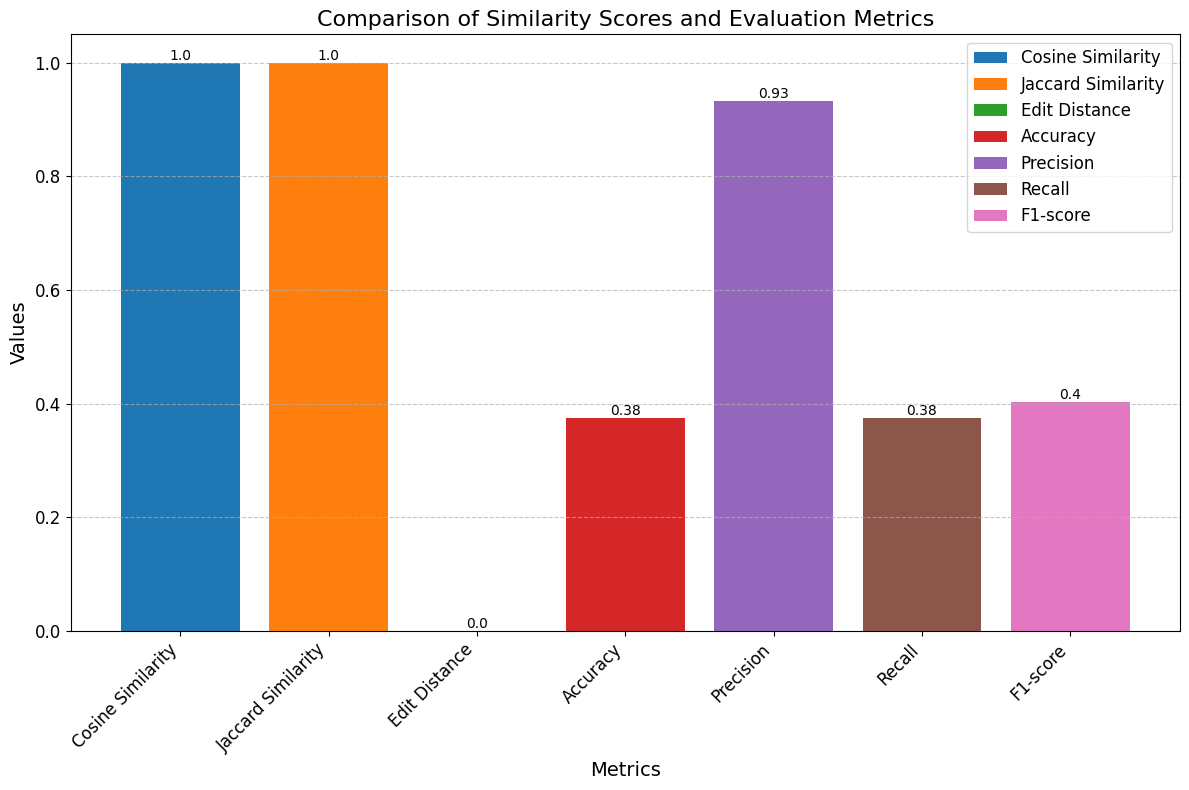

In [65]:
import matplotlib.pyplot as plt
# Define labels and values
labels = ['Cosine Similarity', 'Jaccard Similarity', 'Edit Distance', 'Accuracy', 'Precision', 'Recall', 'F1-score']
values = [avg_cosine_similarity, avg_jaccard_similarity, avg_edit_distance, accuracy, precision, recall, f1]

# Define colors for each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(labels, values, color=colors)

# Add data labels on top of each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2), 
             ha='center', va='bottom')

# Customize plot
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Comparison of Similarity Scores and Evaluation Metrics', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
legend_labels = ['Cosine Similarity', 'Jaccard Similarity', 'Edit Distance', 'Accuracy', 'Precision', 'Recall', 'F1-score']
plt.legend(bars, legend_labels, loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

<div style="text-align:center">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQkO4tC7oVrDSgpOURHKrVkN0rMvri-757NKw&usqp=CAU
" alt="Image">
</div>